In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from impme import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
df = pd.read_excel('HW_Data_Set.xlsx', index_col=None)

In [3]:
dfInfo = Basic_Information(df)


İlk beş değer

   ind_5  ind_6  ind_8      ind_9     ind_10     ind_12     ind_13  ind_14  \
0     19     17  100.0  85.714286  14.285714  72.363515  60.808814   23.80   
1     24     19  100.0  78.571429  21.428571  74.275883  64.366798   11.45   
2     30     24  100.0  71.428571  28.571429  75.140402  65.915803    8.75   
3     37     30  100.0  64.285714  35.714286  76.677846  68.584234    7.80   
4     41     37  100.0  57.142857  42.857143  81.603007  76.455495   14.90   

   ind_15  ind_16  ...  ind_416  ind_418  ind_420  ind_422  ind_424   ind_426  \
0   17.62   11.73  ...    -49.6      -54     -152     -353      1.0  0.498547   
1   18.16   12.22  ...    -55.6      -60     -158     -359      1.0  0.537088   
2   17.86   12.28  ...    -58.4      -60     -160     -362      1.0  0.615169   
3   14.76   12.61  ...    -61.8      -65     -166     -367      1.0  0.661517   
4   11.92   14.25  ...    -79.8      -86     -186     -388      1.0  0.747204   

    ind_428  20_target  50_t

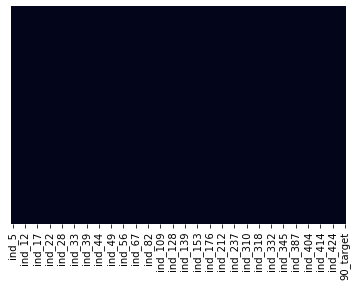

In [4]:
dfInfo.Info()

In [5]:
dfnum = df.select_dtypes(include = ["int64","float64"])

In [6]:
dfvis = Vis(dfnum)

90_target    1.000000
50_target    0.940916
20_target    0.355950
ind_18       0.140877
ind_17       0.129277
               ...   
ind_128     -0.061283
ind_26      -0.086192
ind_330     -0.093811
ind_418     -0.096903
ind_324     -0.103707
Name: 90_target, Length: 133, dtype: float64


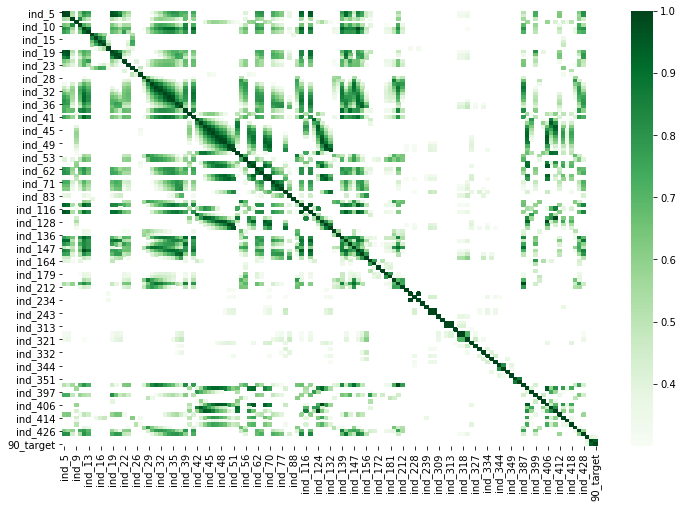

In [7]:
dfvis.corrheat("90_target",.3)

C:\Users\Taner\Desktop\kodluyoruz Bootcamp\kodluyoruz ödev\impme.py:167: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


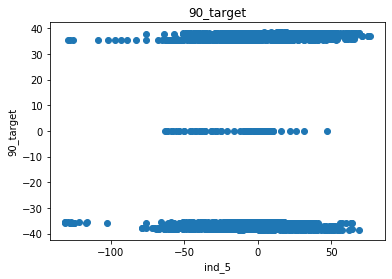

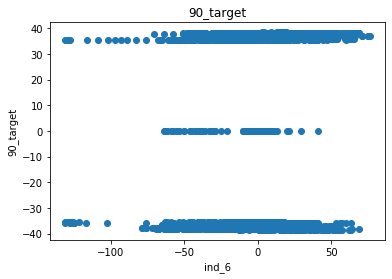

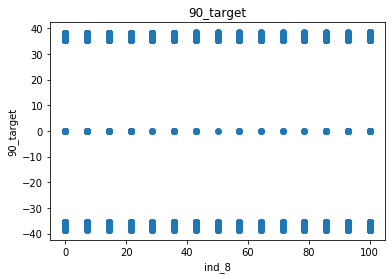

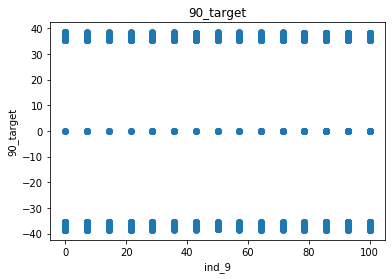

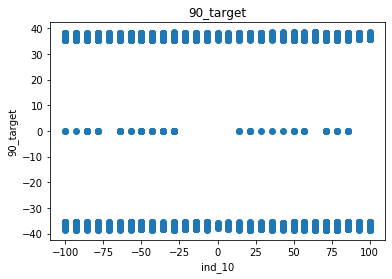

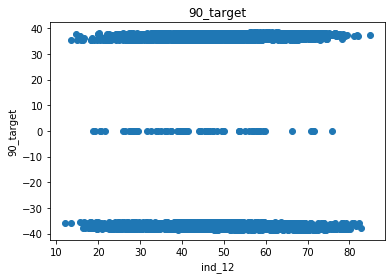

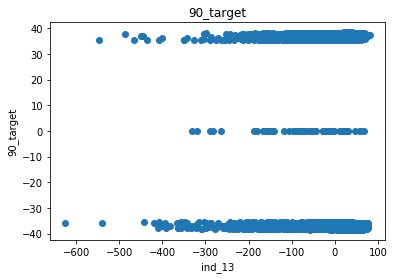

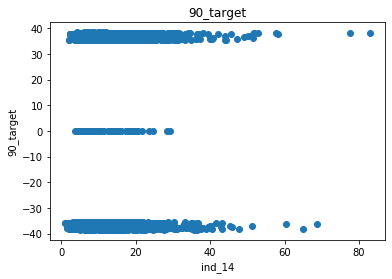

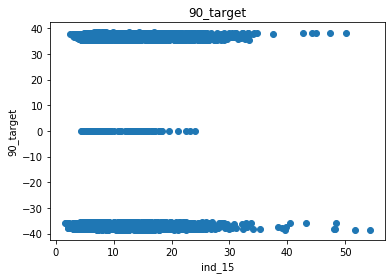

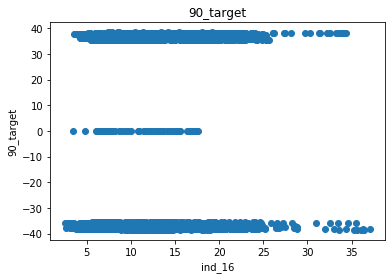

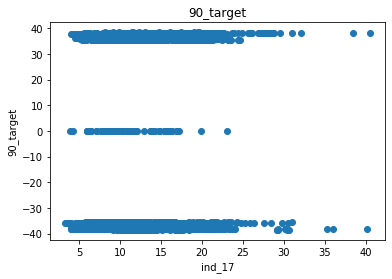

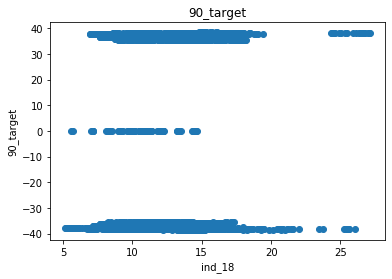

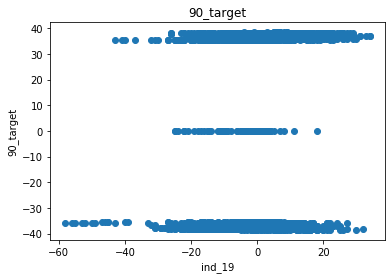

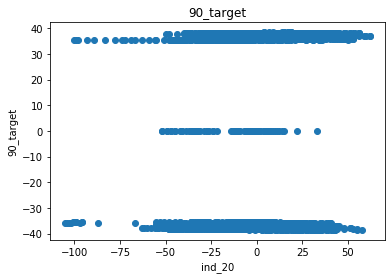

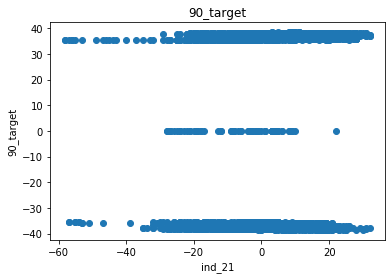

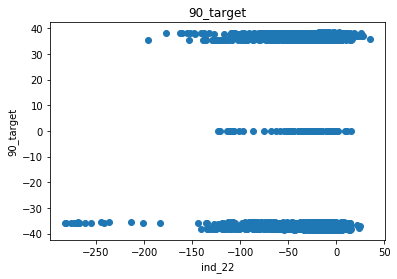

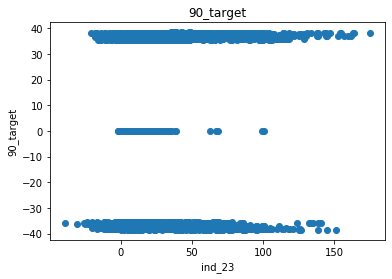

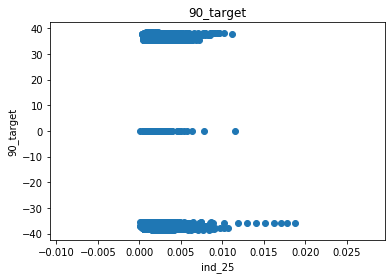

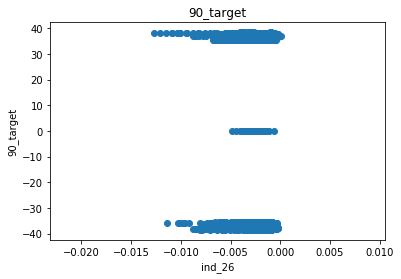

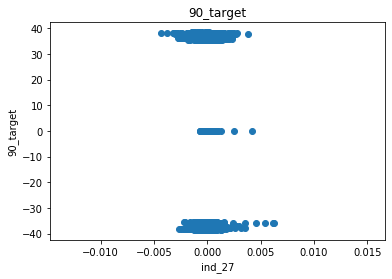

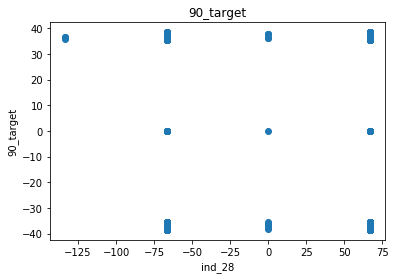

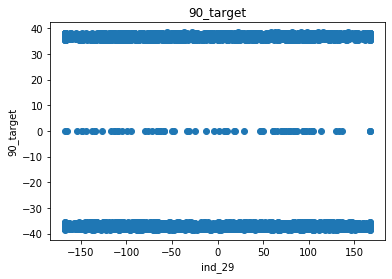

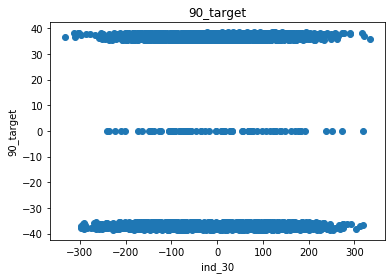

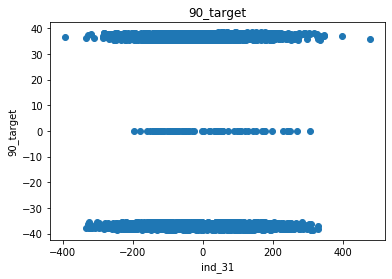

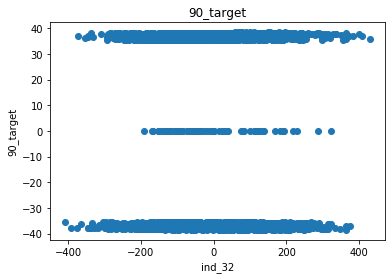

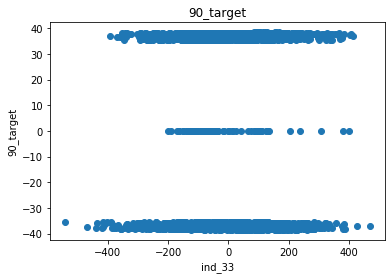

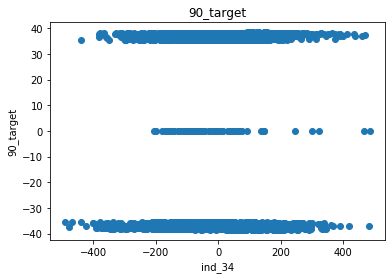

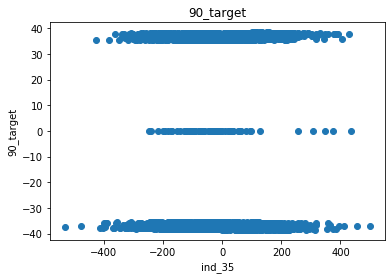

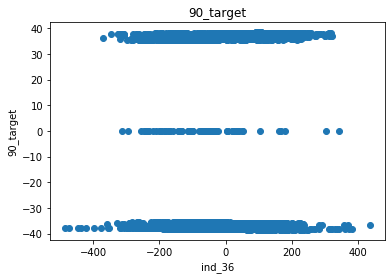

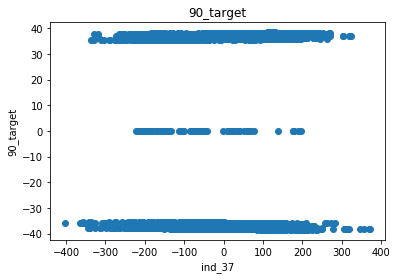

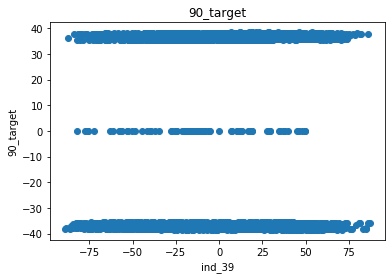

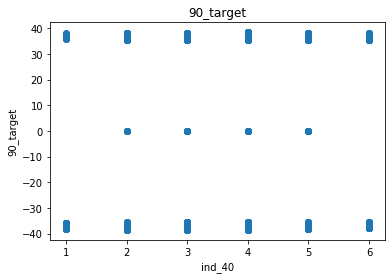

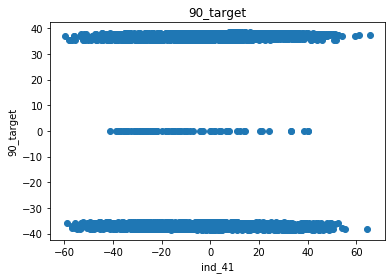

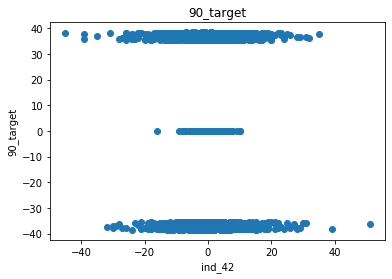

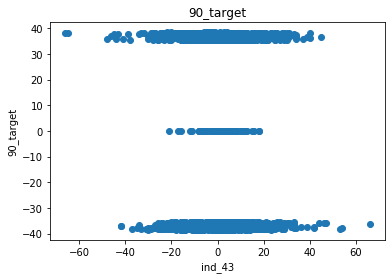

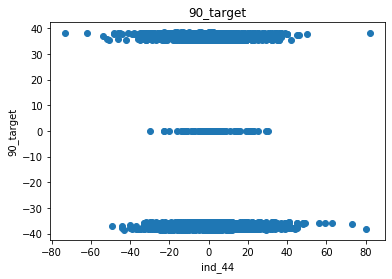

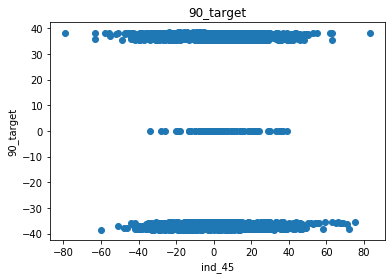

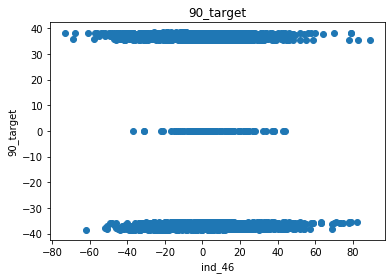

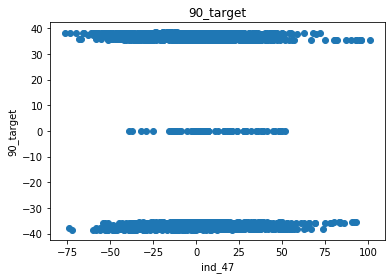

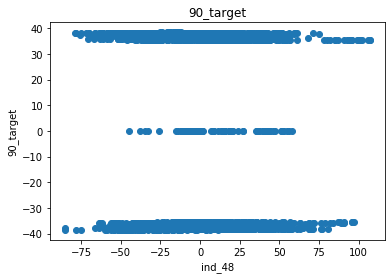

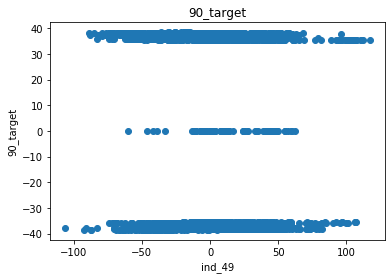

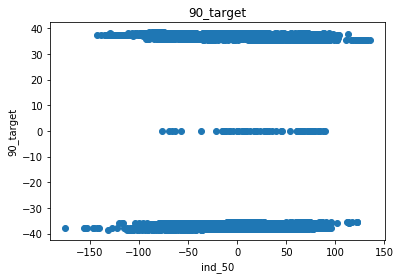

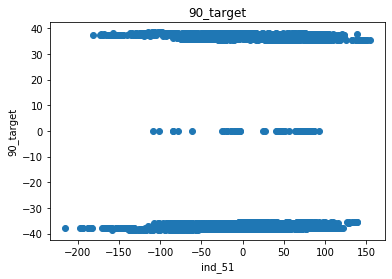

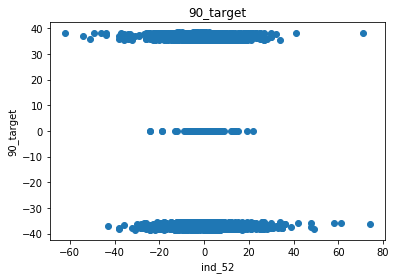

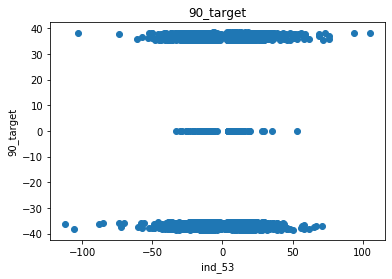

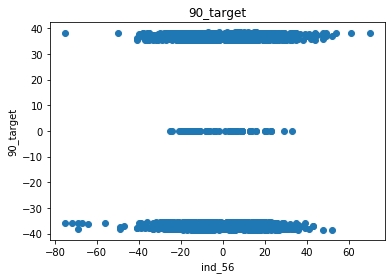

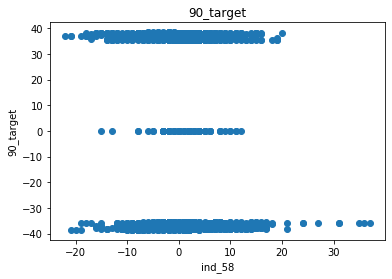

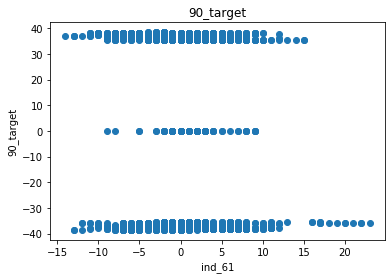

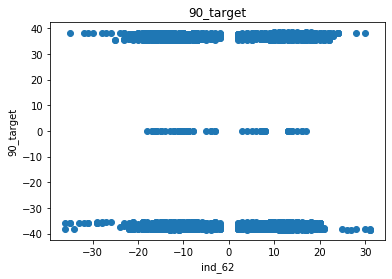

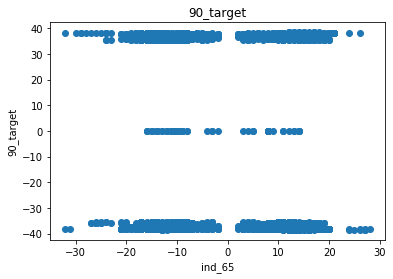

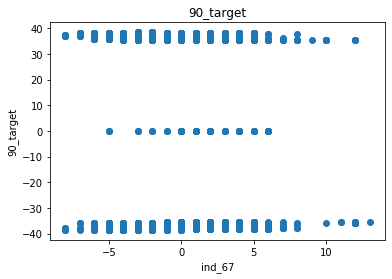

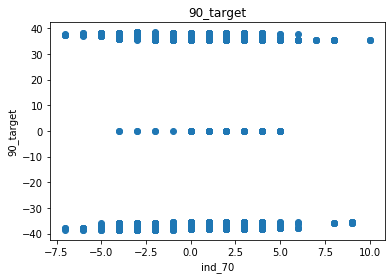

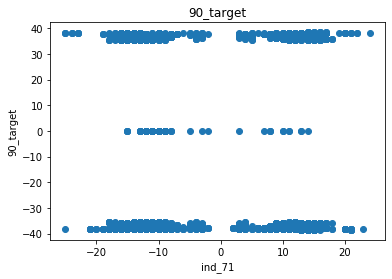

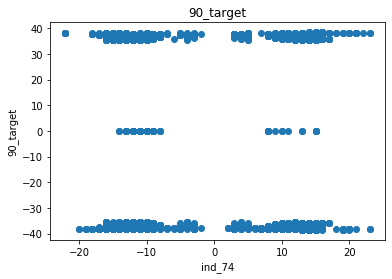

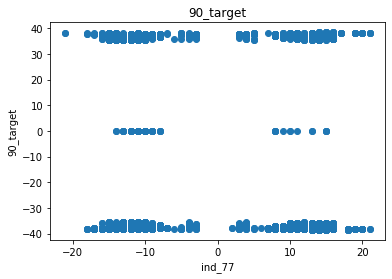

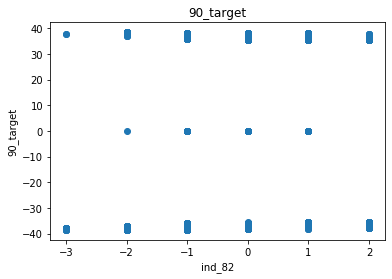

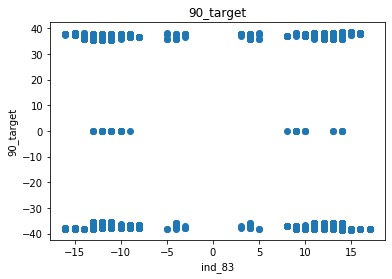

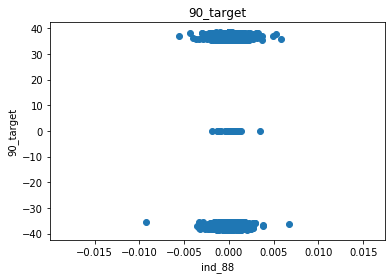

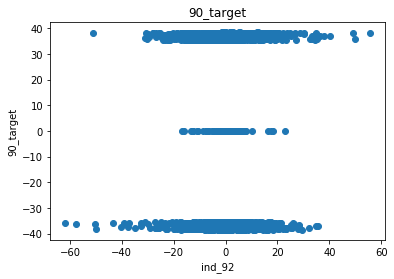

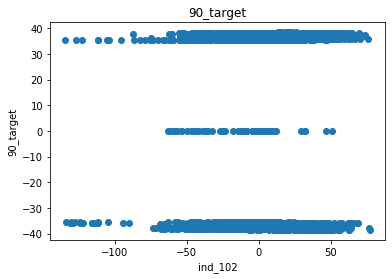

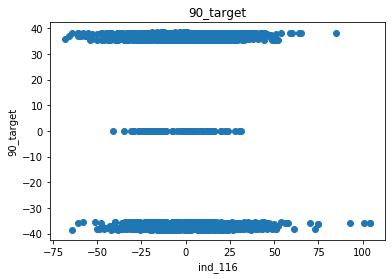

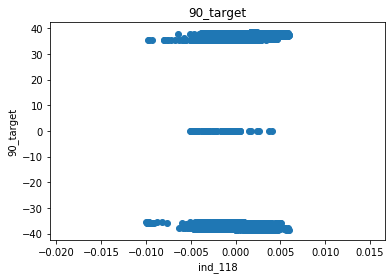

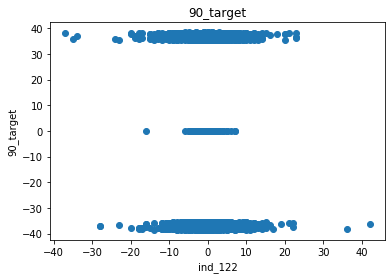

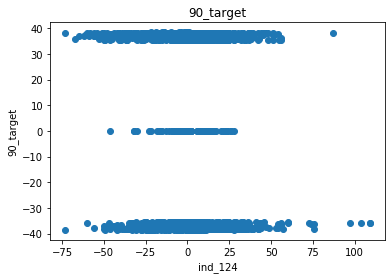

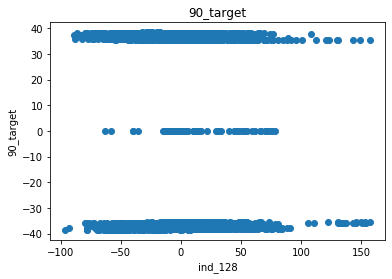

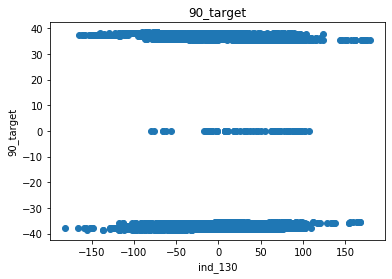

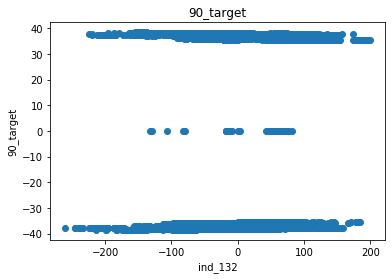

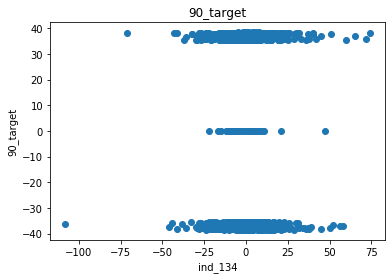

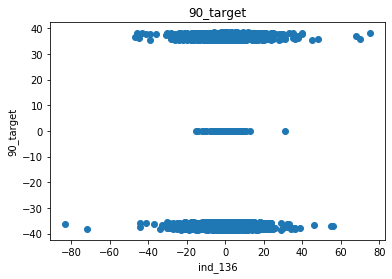

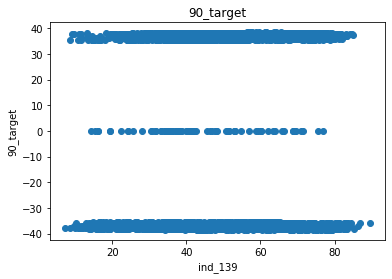

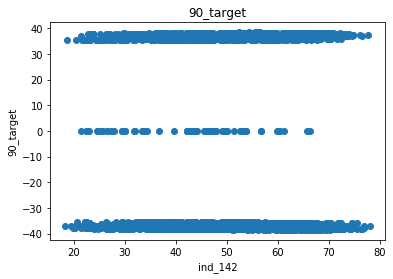

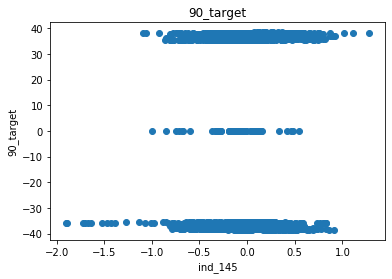

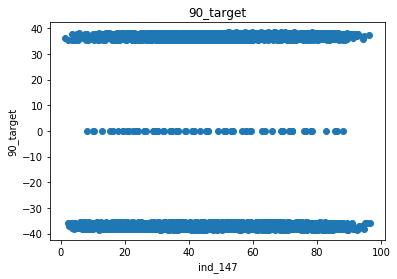

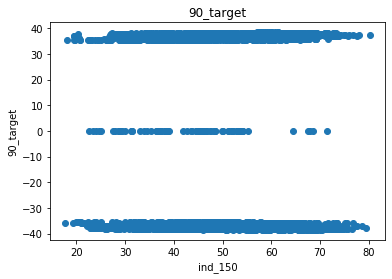

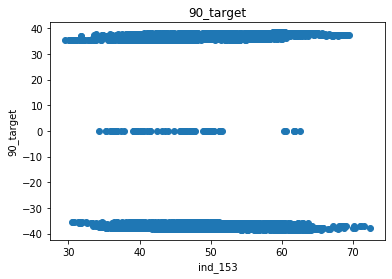

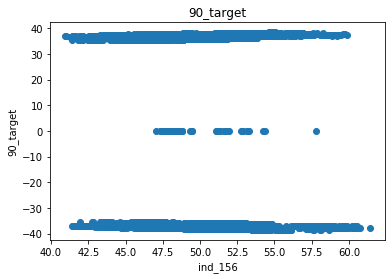

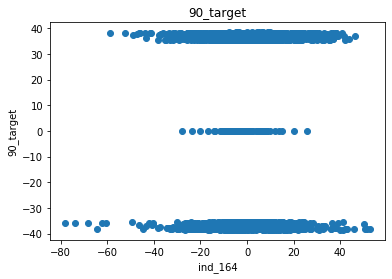

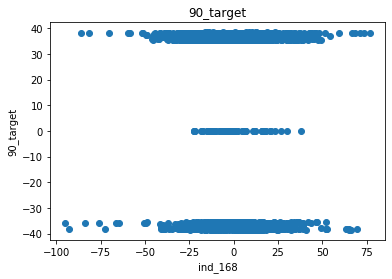

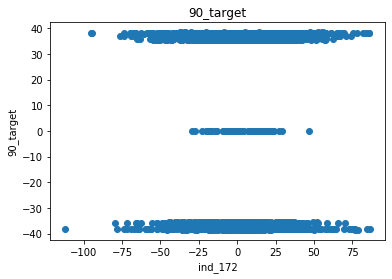

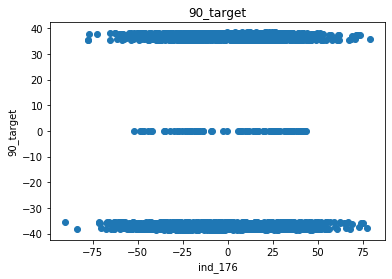

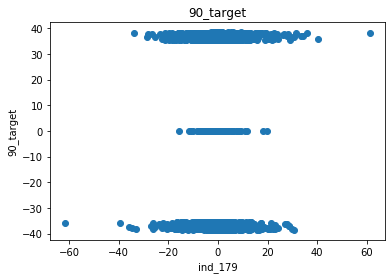

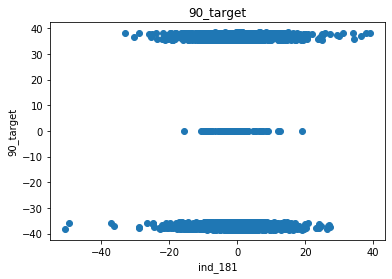

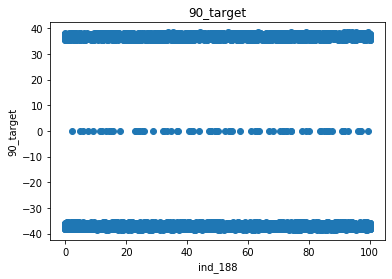

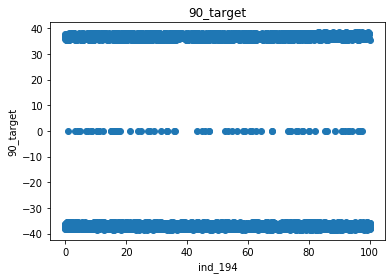

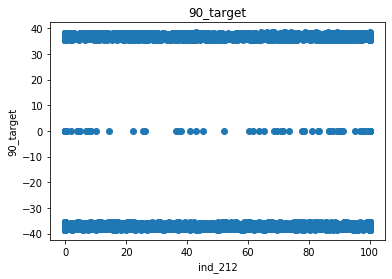

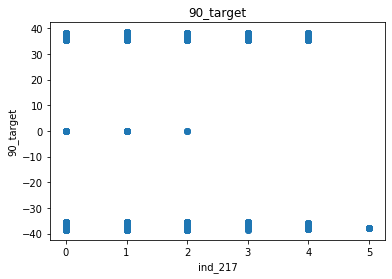

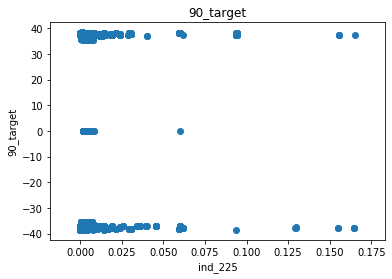

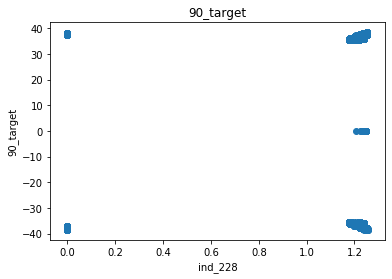

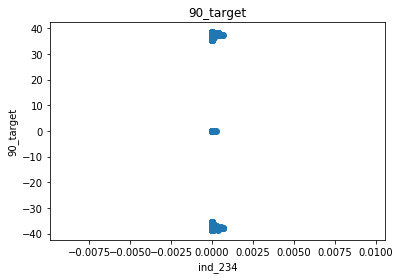

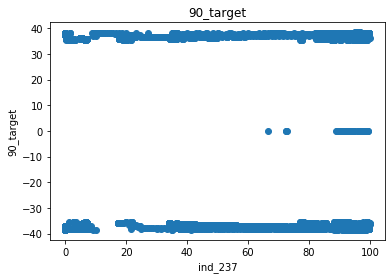

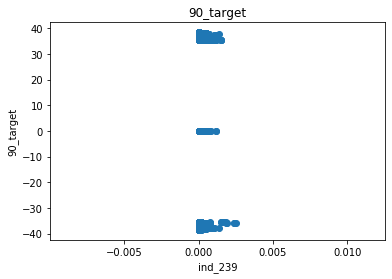

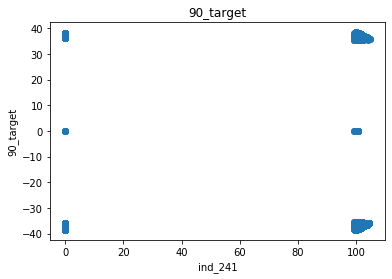

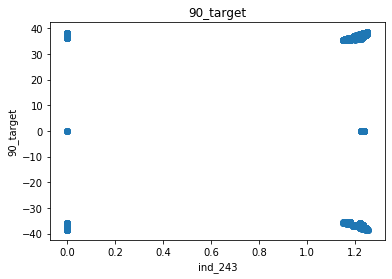

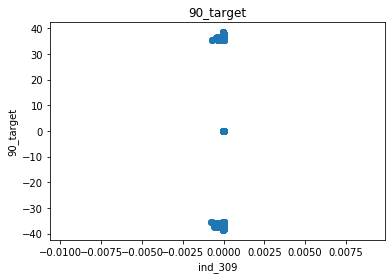

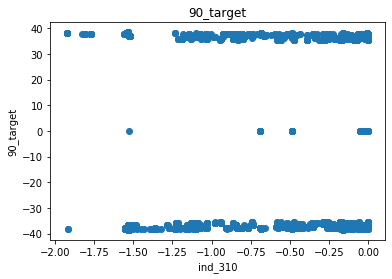

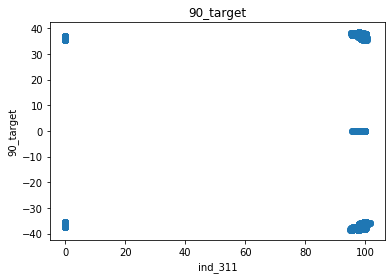

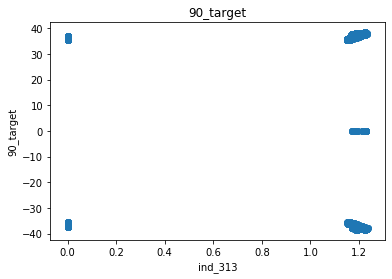

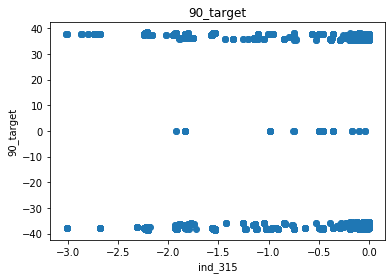

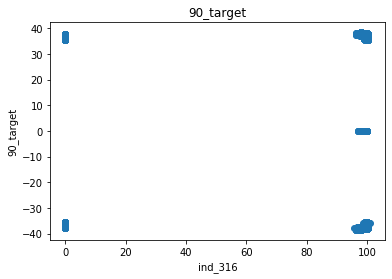

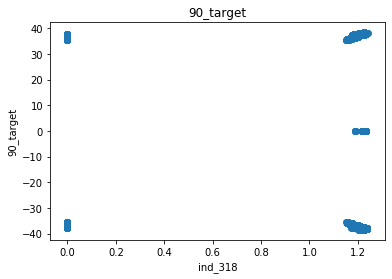

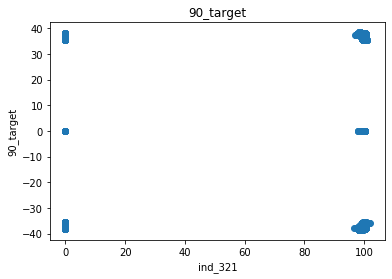

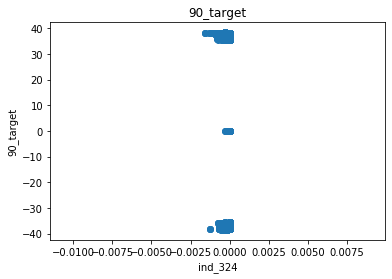

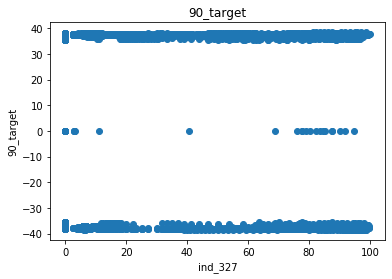

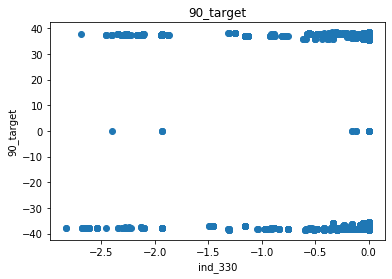

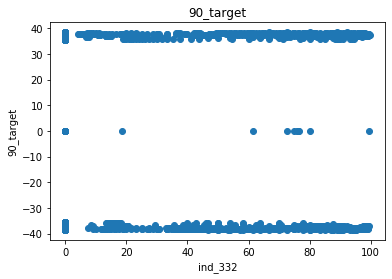

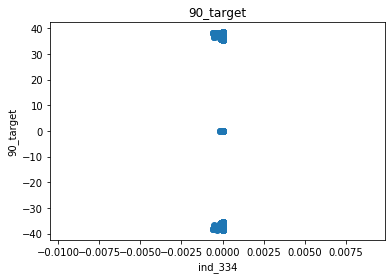

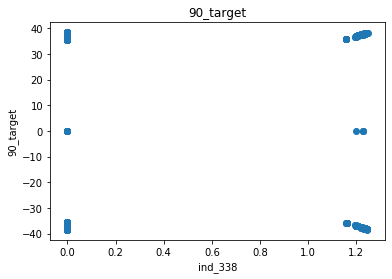

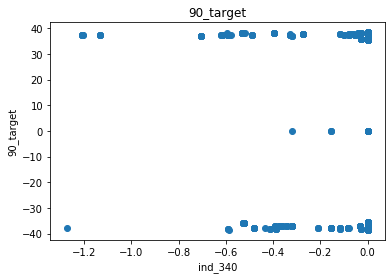

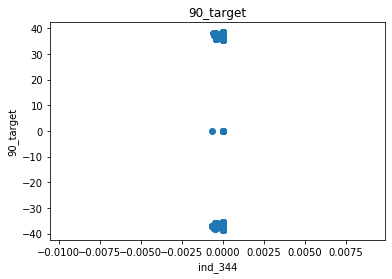

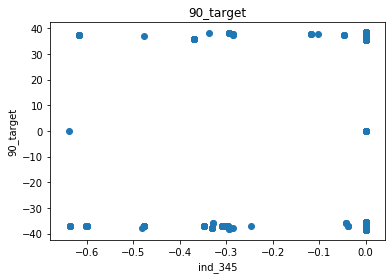

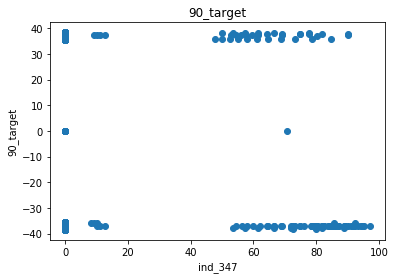

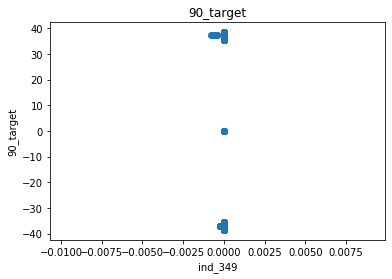

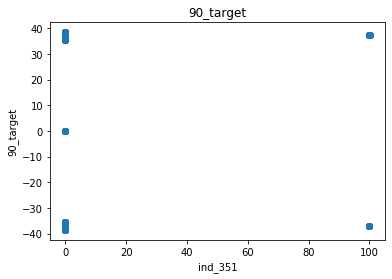

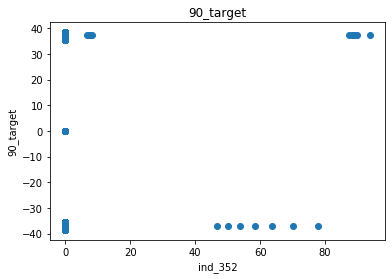

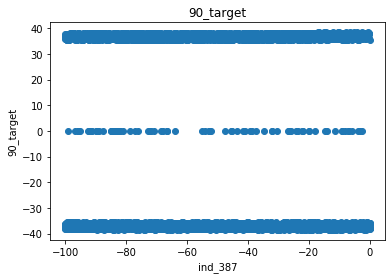

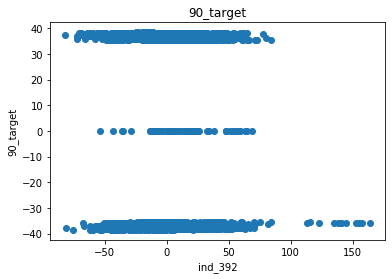

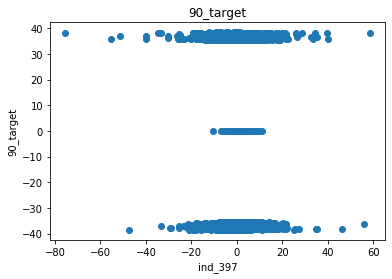

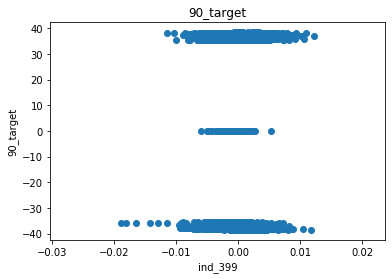

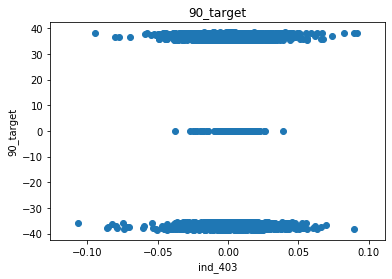

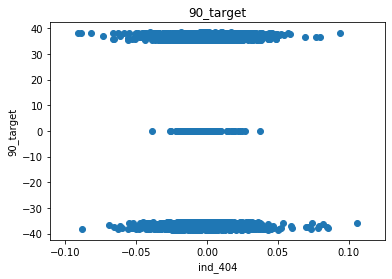

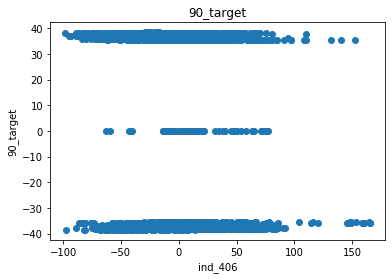

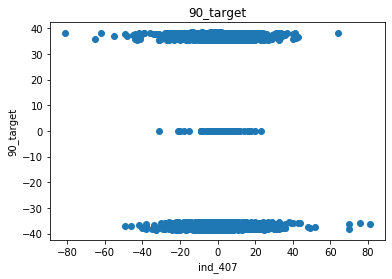

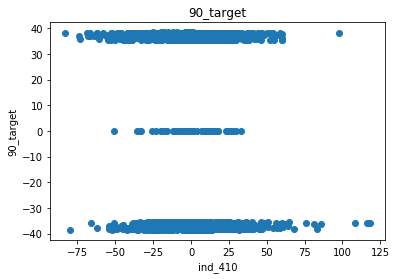

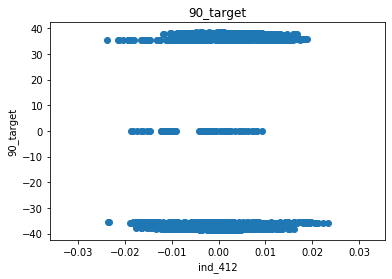

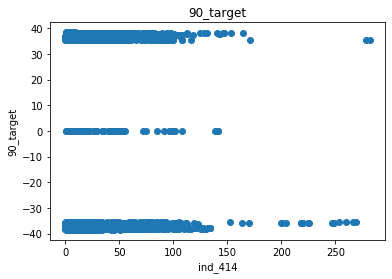

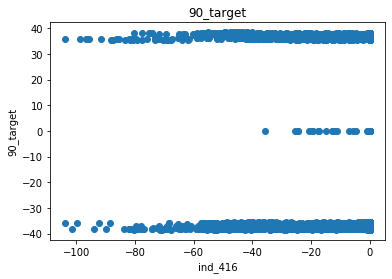

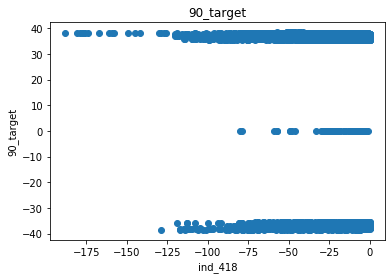

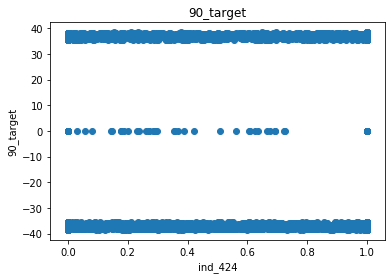

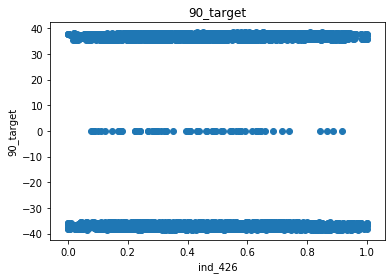

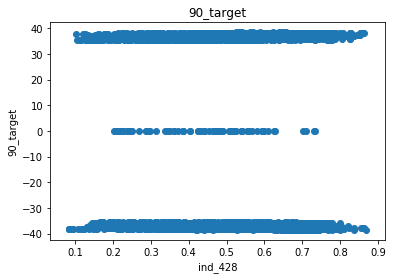

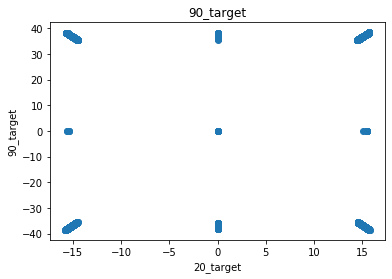

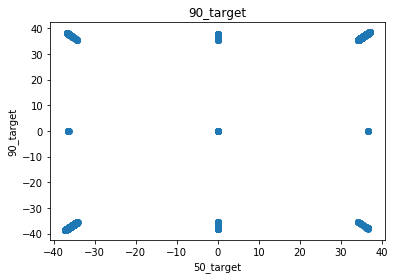

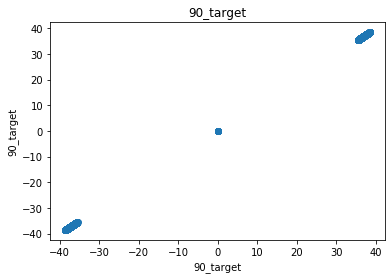

In [8]:
dfvis.scatter("90_target")

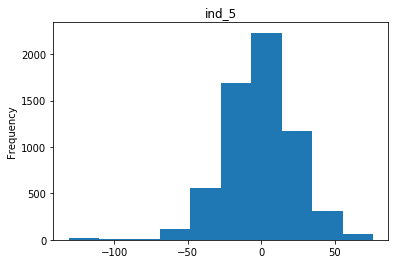

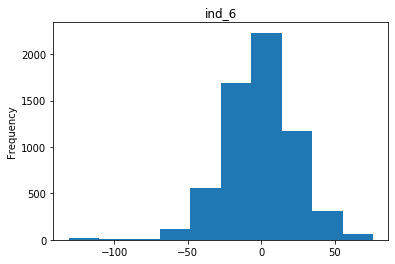

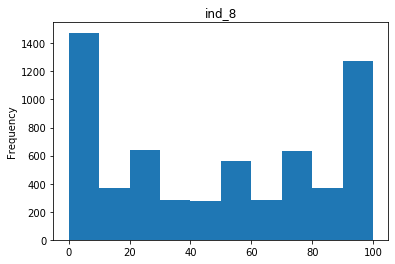

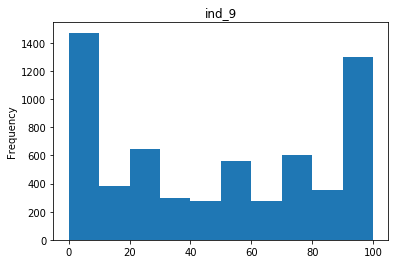

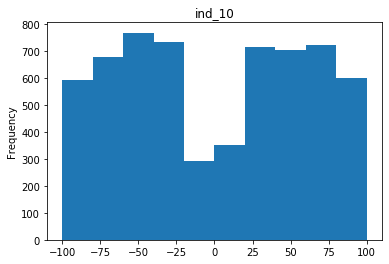

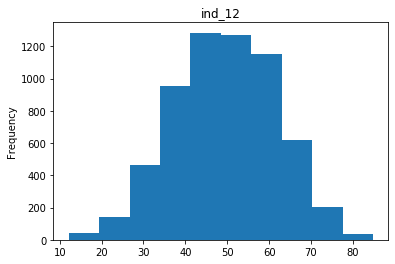

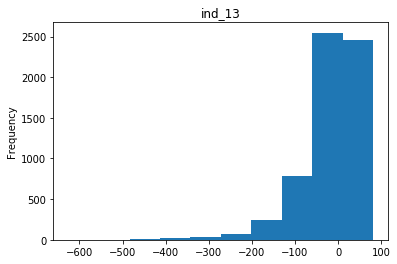

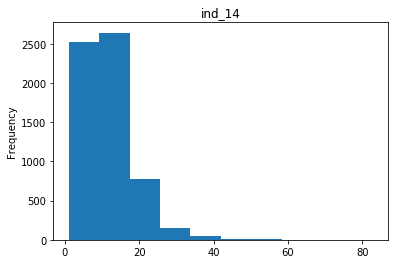

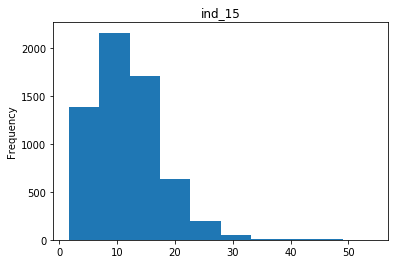

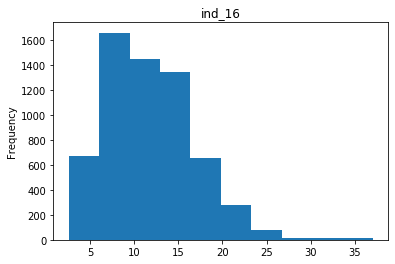

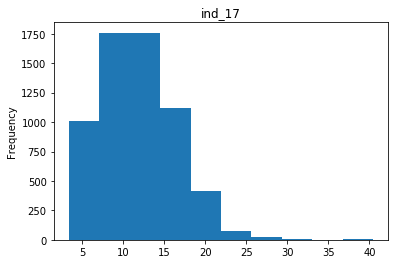

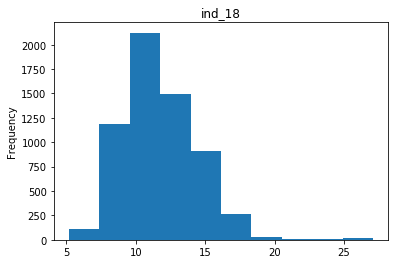

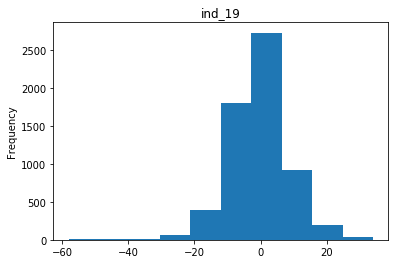

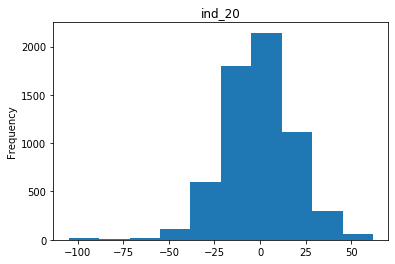

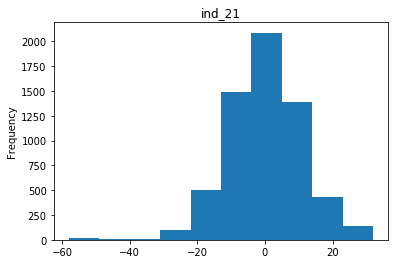

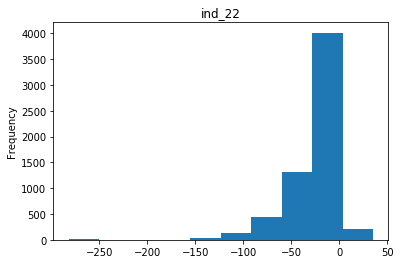

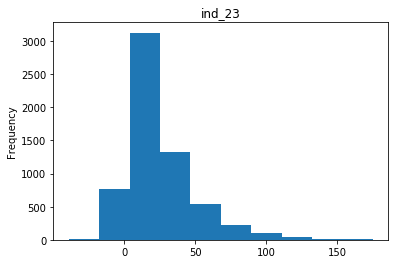

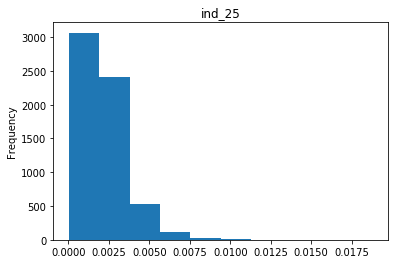

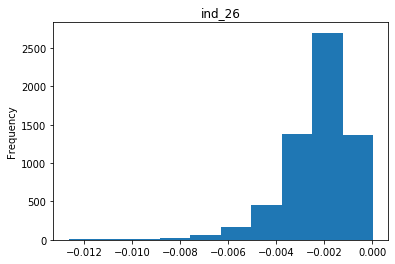

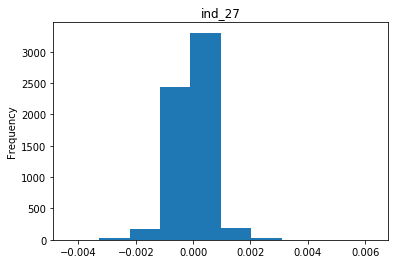

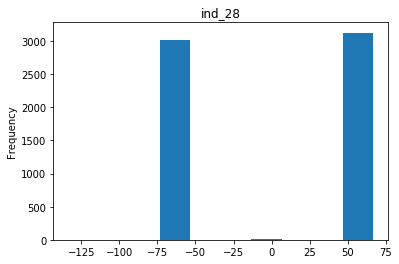

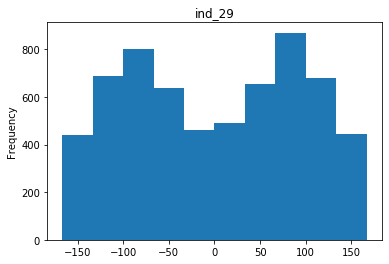

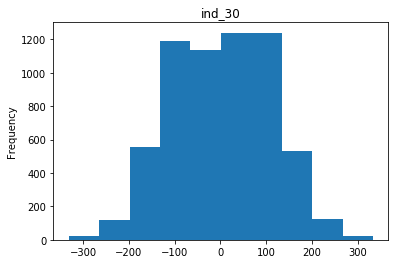

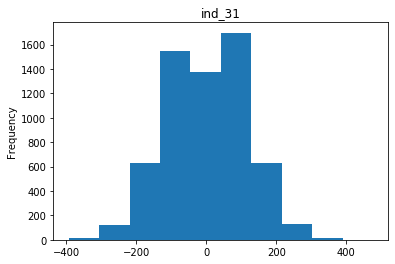

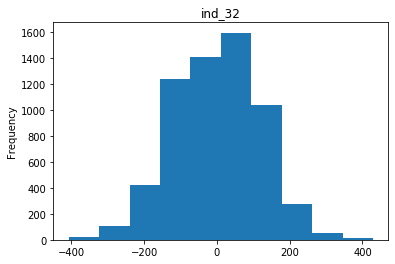

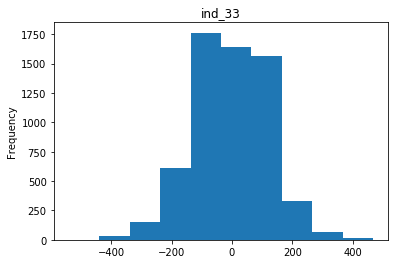

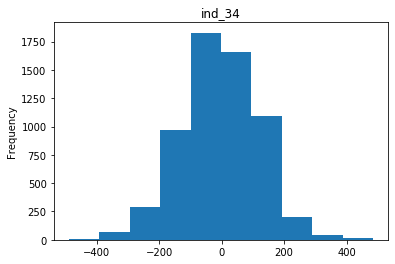

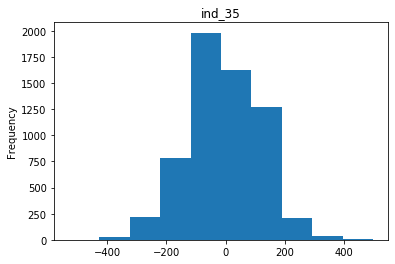

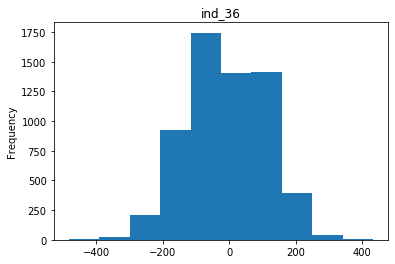

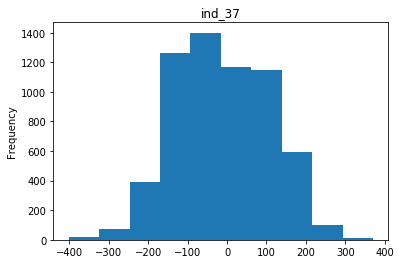

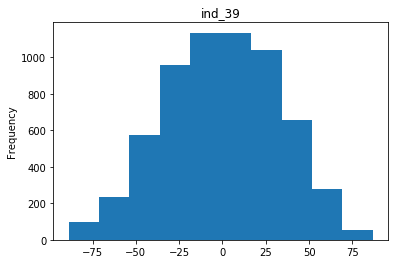

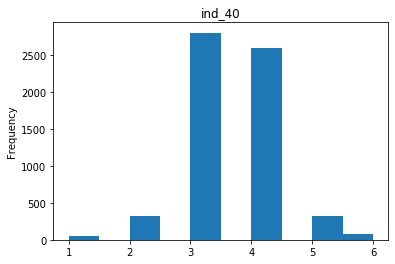

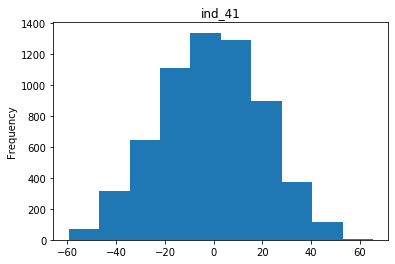

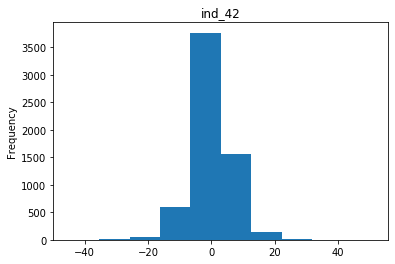

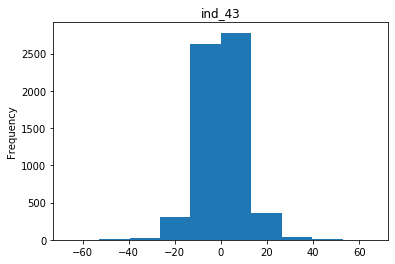

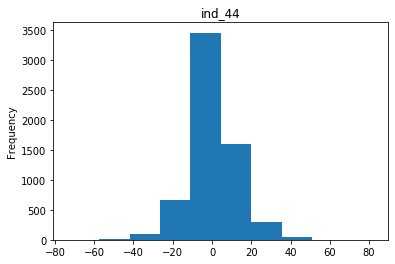

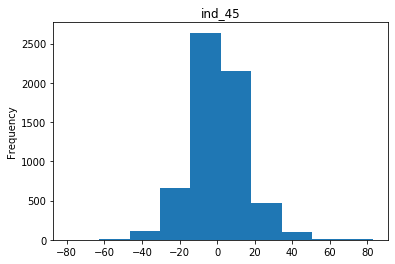

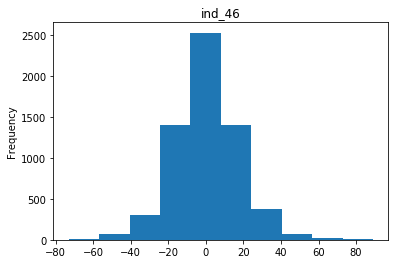

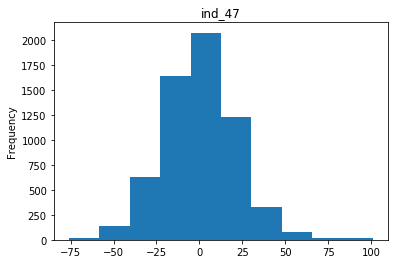

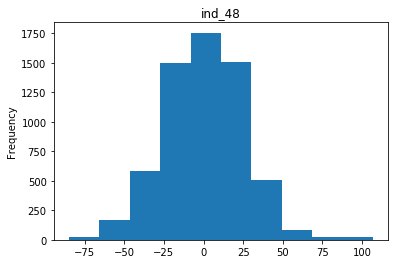

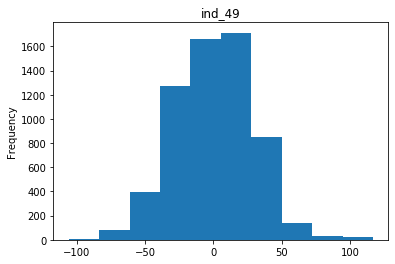

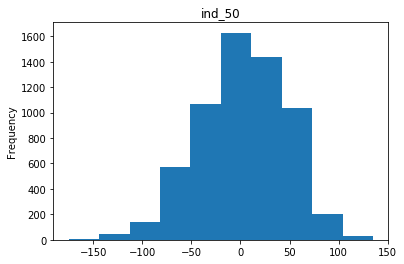

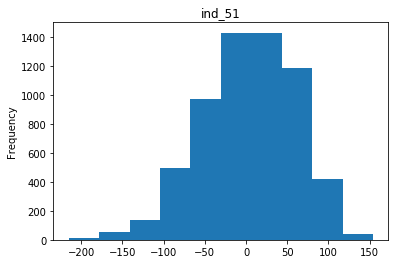

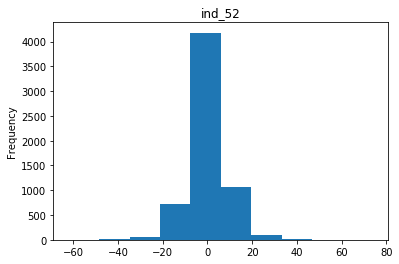

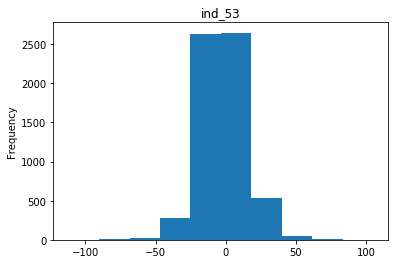

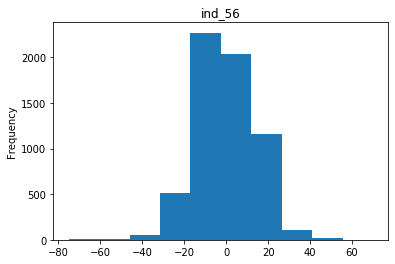

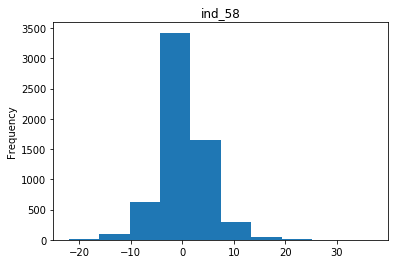

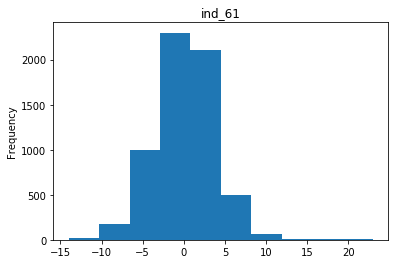

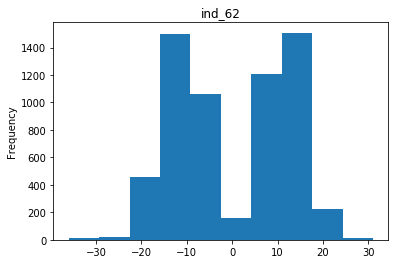

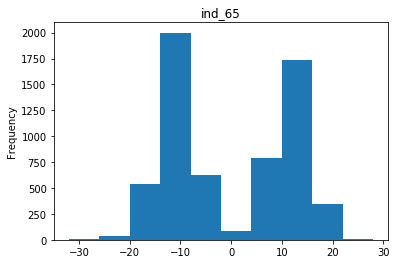

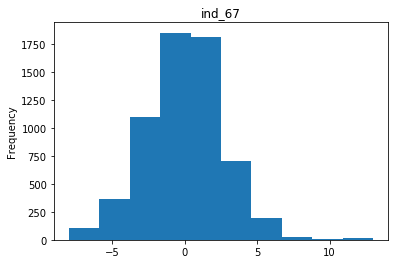

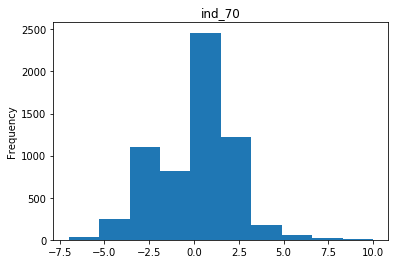

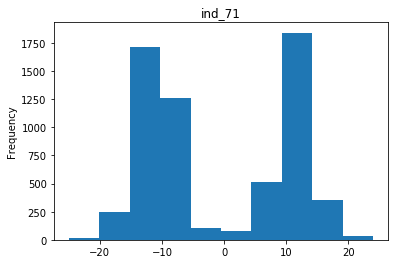

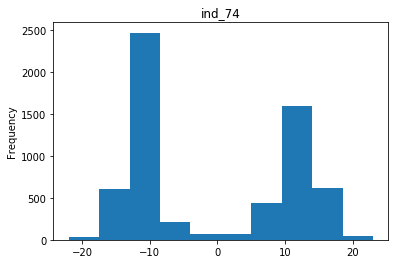

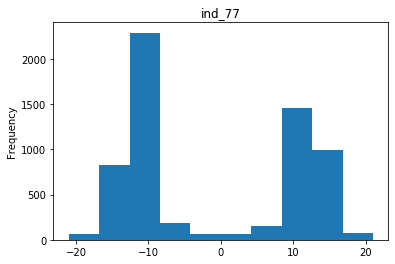

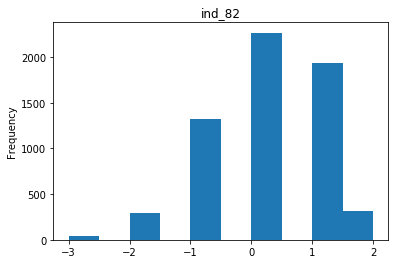

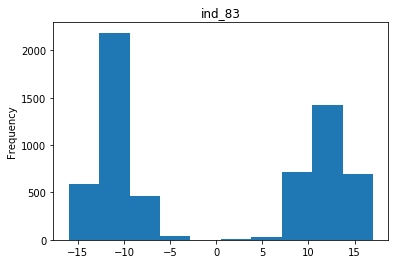

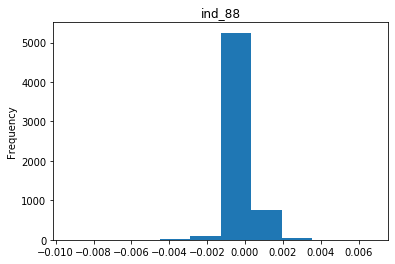

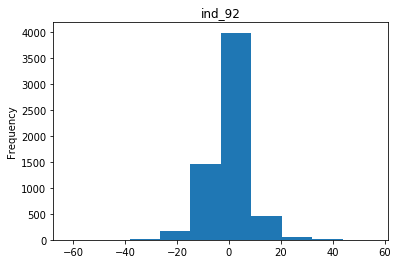

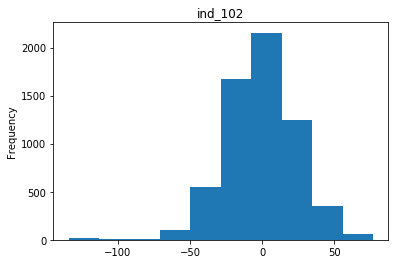

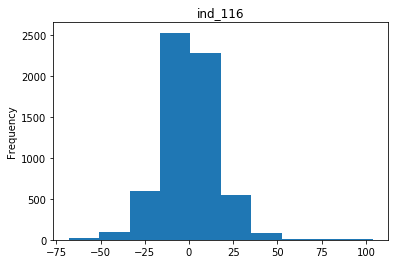

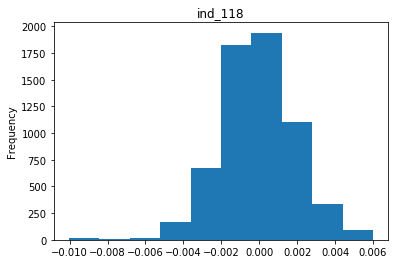

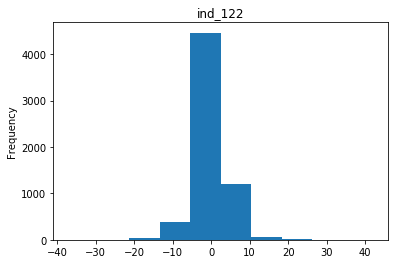

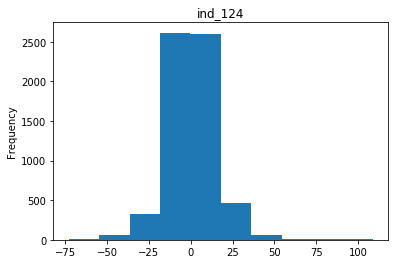

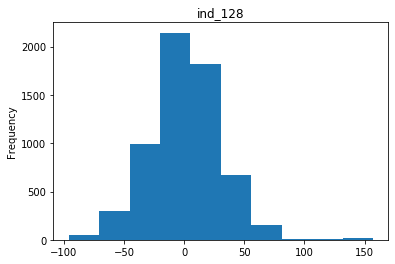

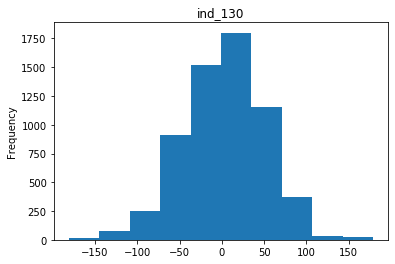

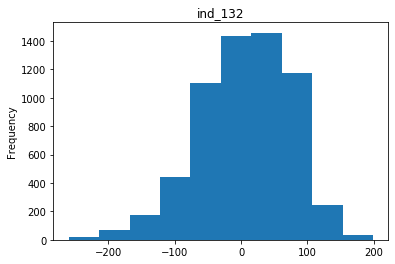

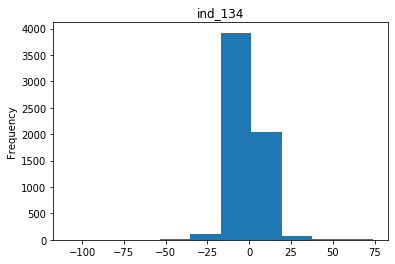

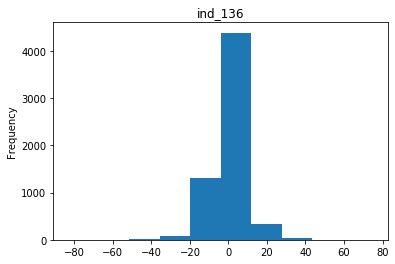

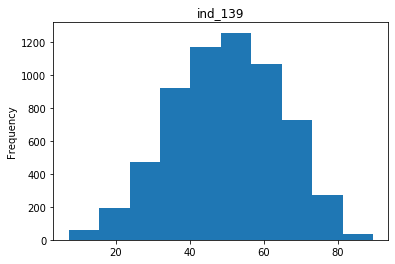

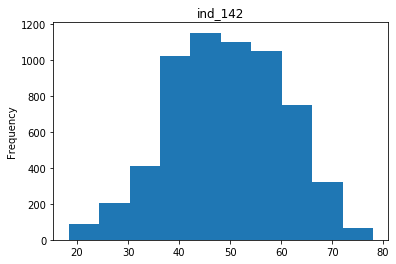

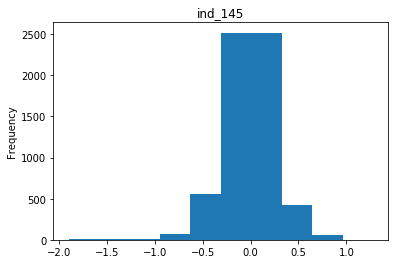

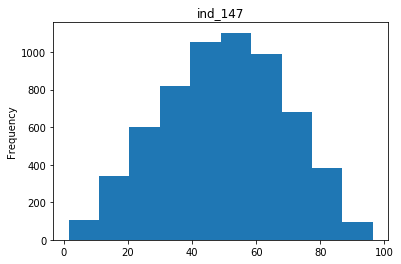

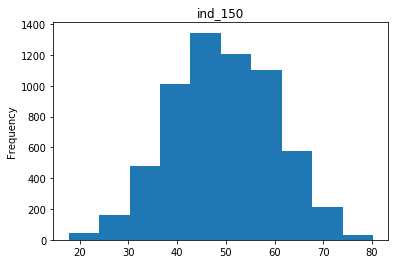

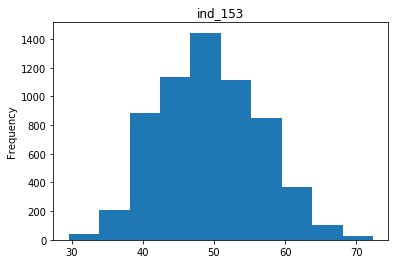

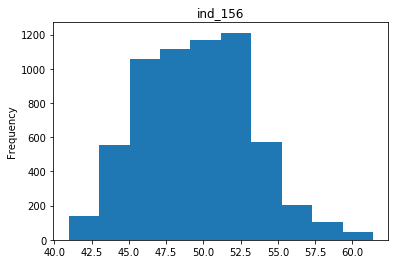

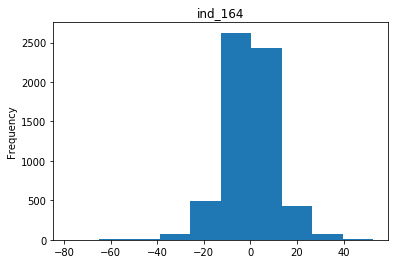

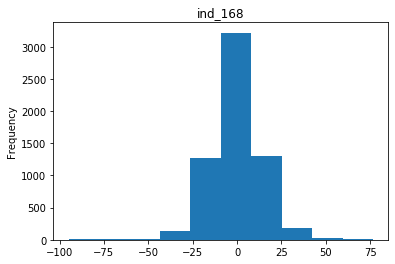

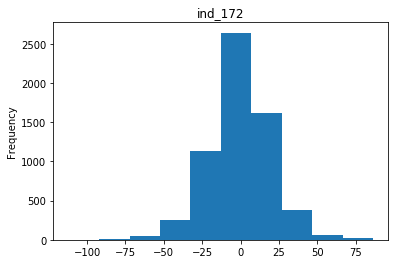

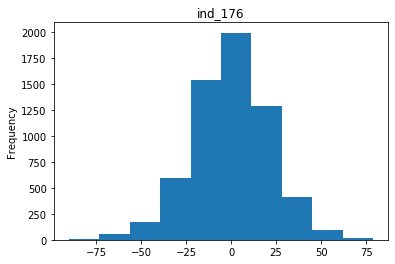

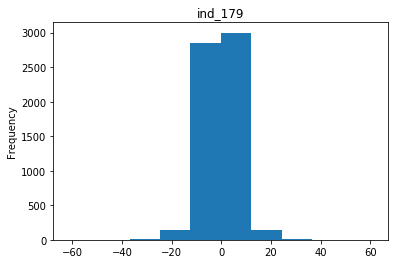

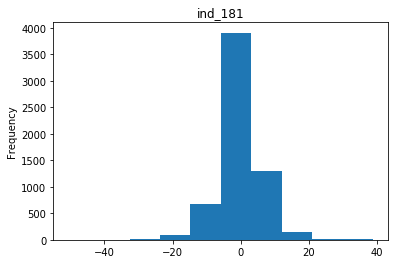

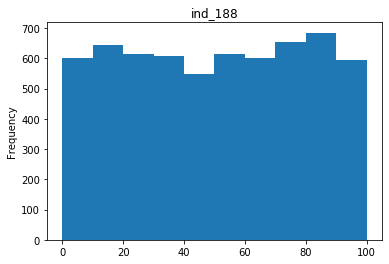

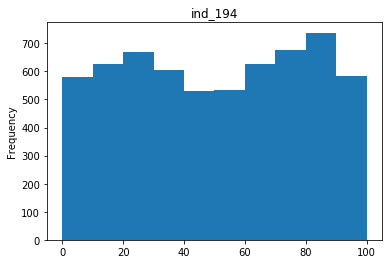

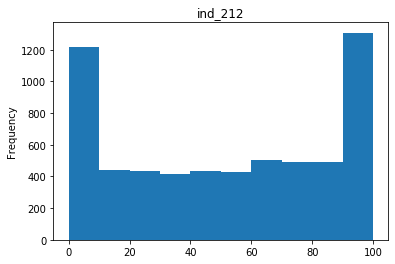

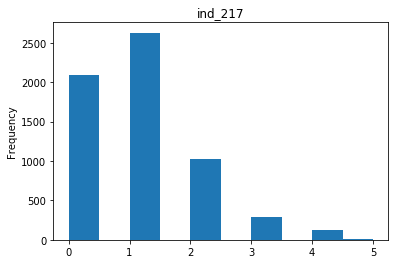

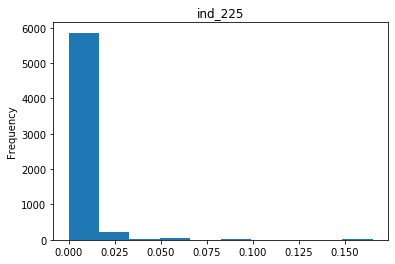

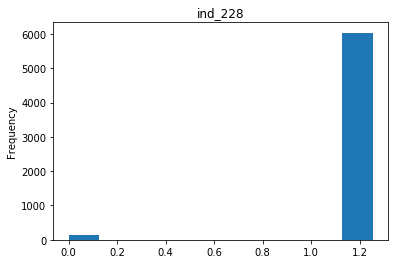

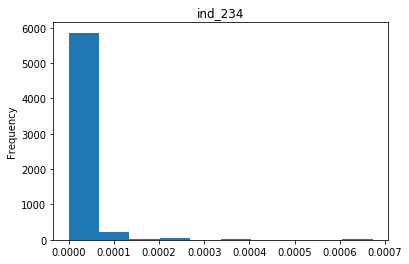

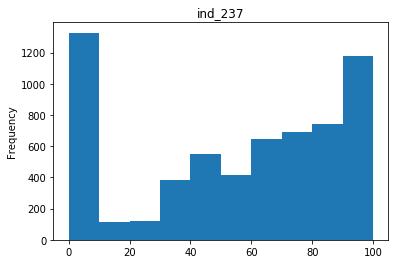

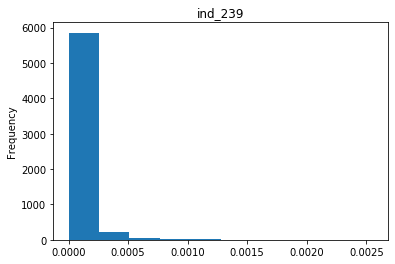

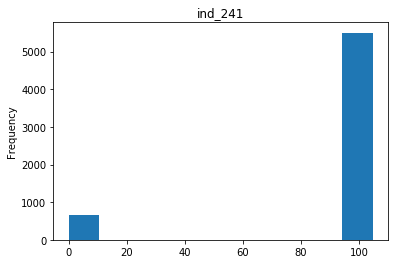

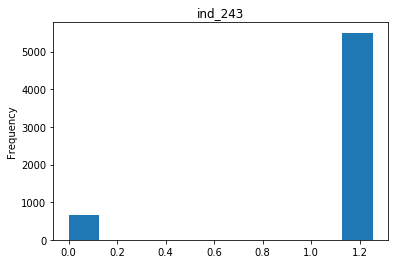

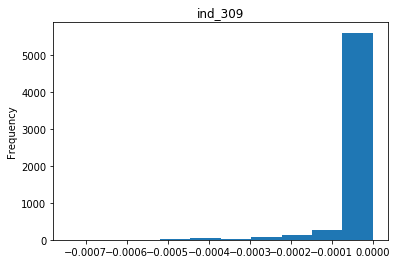

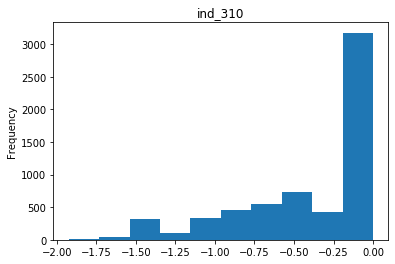

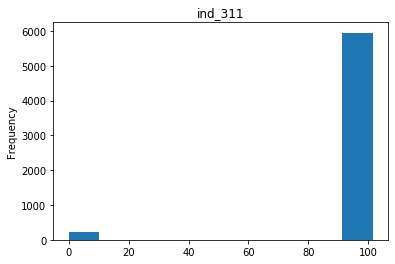

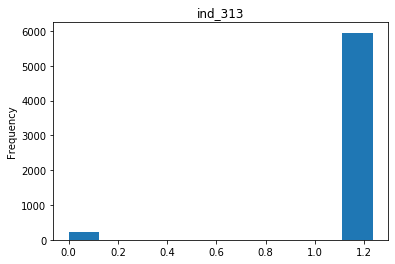

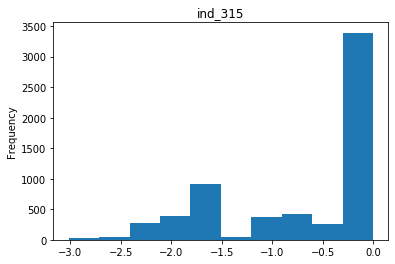

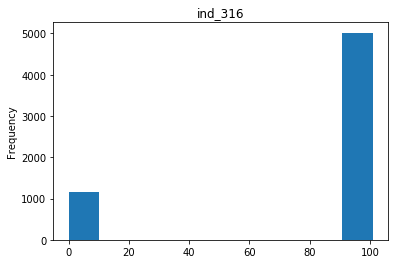

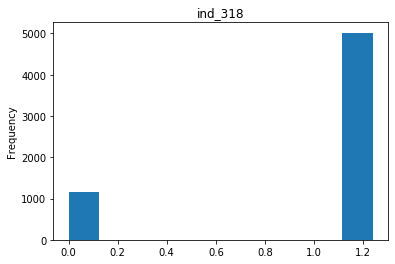

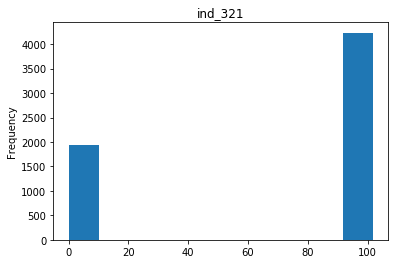

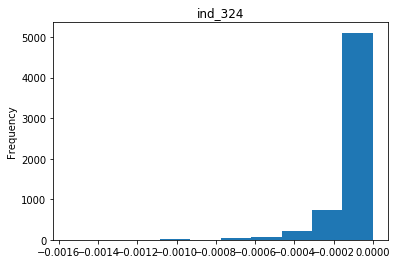

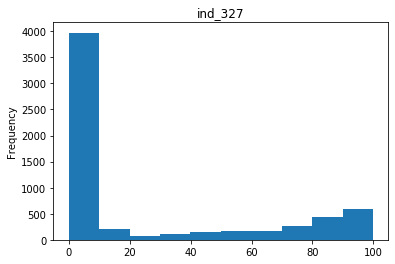

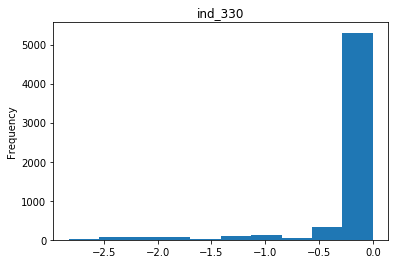

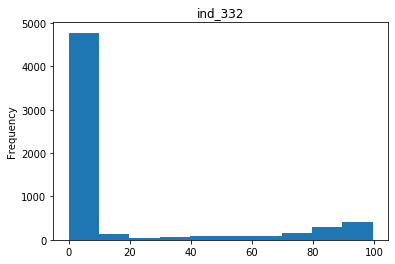

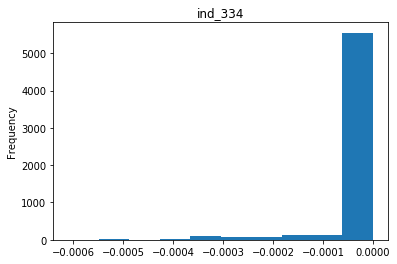

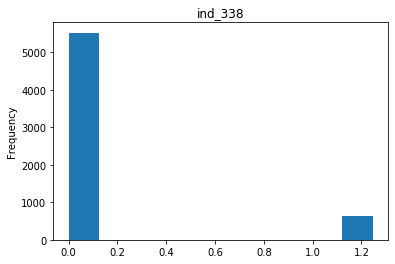

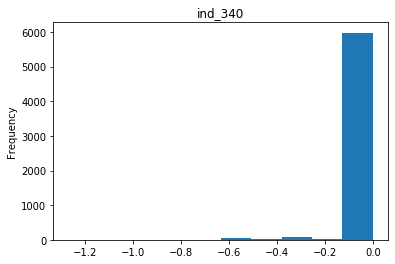

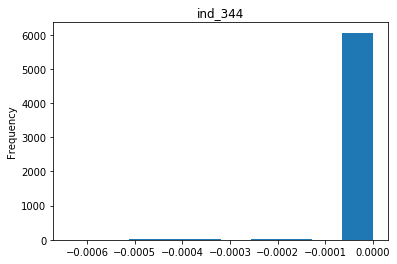

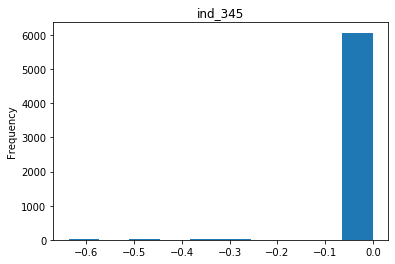

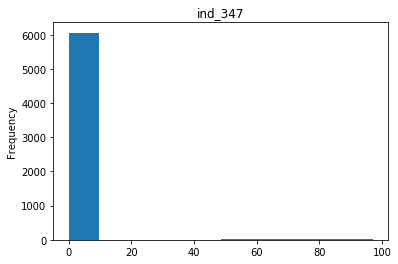

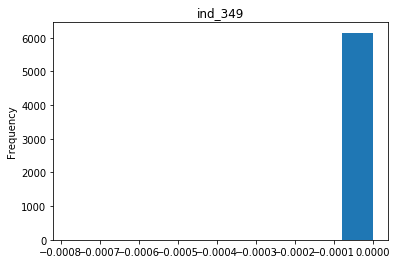

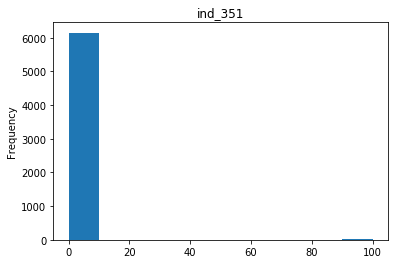

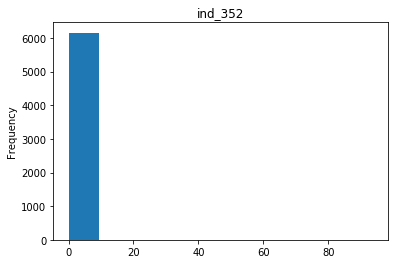

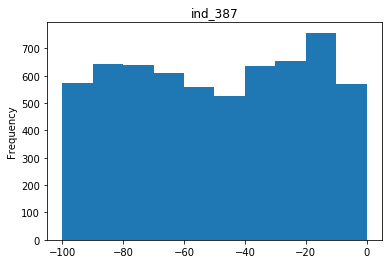

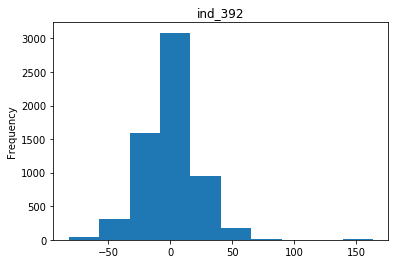

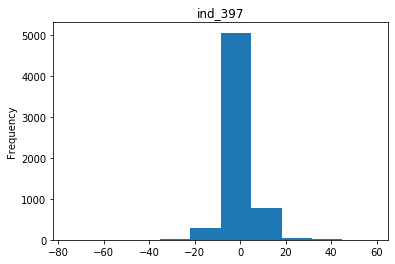

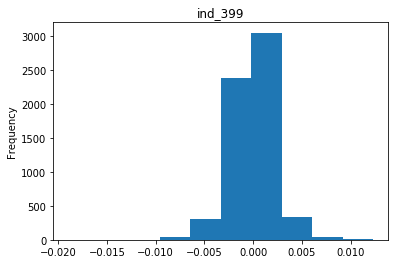

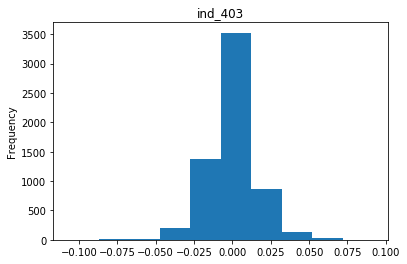

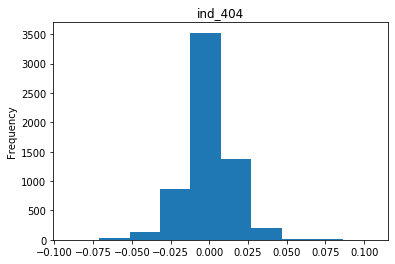

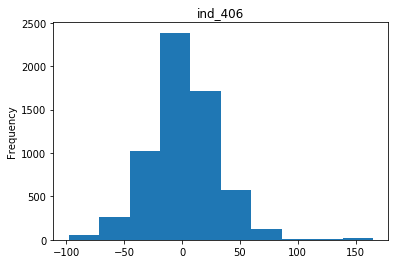

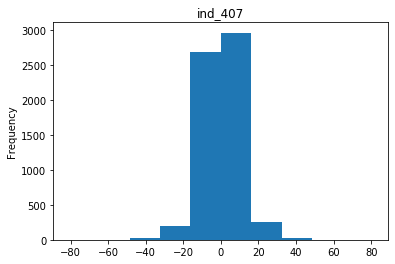

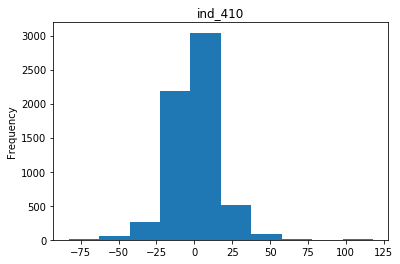

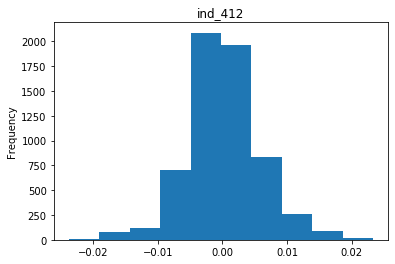

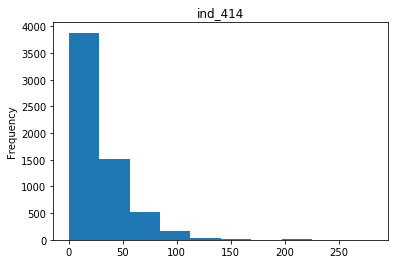

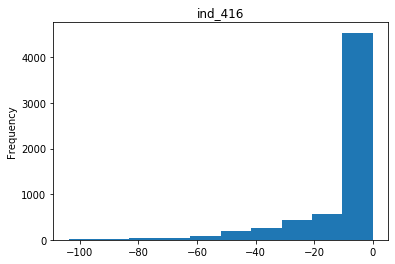

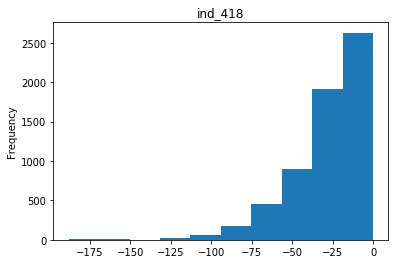

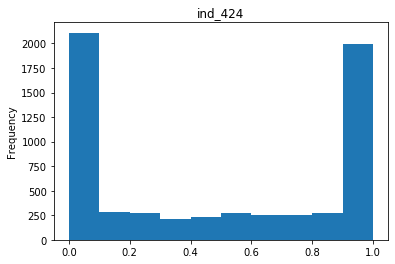

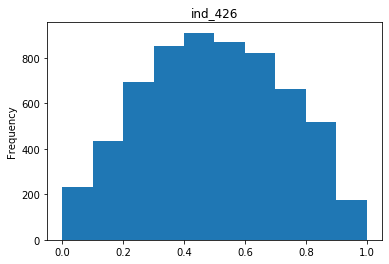

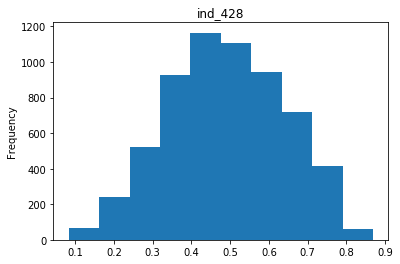

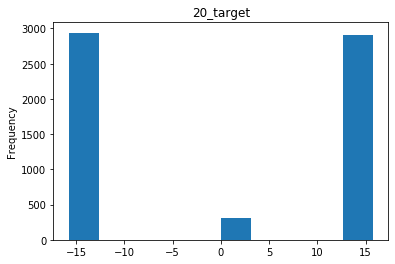

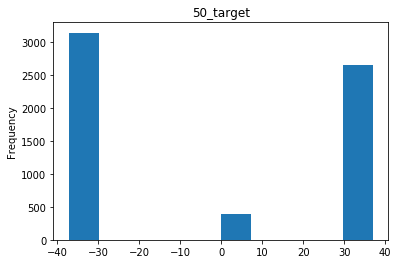

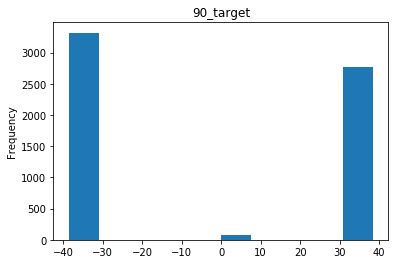

In [9]:
dfvis.hist()

In [3]:
df.select_dtypes(include= "object")

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388
...,...,...,...
6162,RED,-11,-270
6163,RED,-12,-271
6164,GREEN,-21,-280
6165,GREEN,-33,-292


In [12]:
df["ind_109"].value_counts()

GREEN    3132
RED      3035
Name: ind_109, dtype: int64

In [13]:
df["ind_420"].value_counts()

?       1041
28        37
45        35
29        33
39        33
        ... 
-327       1
-330       1
-349       1
297        1
-346       1
Name: ind_420, Length: 582, dtype: int64

In [14]:
df["ind_422"].value_counts()

?       1041
-211      33
-125      31
-200      30
-130      28
        ... 
-500       1
-496       1
-484       1
-482       1
-509       1
Name: ind_422, Length: 573, dtype: int64

In [7]:
# ? neredeyse tüm datanın 6 da 1 i , anlamını bilmediğimiz için dolduramıyoruz. 130 değişkenden 2 sini silmek daha
#mantıklı geldi. 

In [8]:
a = df[["ind_420", "ind_422"]]

In [9]:
dff = df.drop(labels=a,axis = 1)

In [10]:
dff


,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54,1.000000,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60,1.000000,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60,1.000000,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65,1.000000,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.000000,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86,1.000000,0.747204,0.700522,-15.179065,-35.727079,-37.103503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,27,31,57.142857,28.571429,28.571429,60.010531,32.362582,9.70,9.38,13.66,...,0.004633,14.7,-28.2,-40,0.270270,0.840000,0.600846,14.673247,-34.536532,-35.867088
6163,22,27,50.000000,21.428571,28.571429,60.209998,32.914628,7.65,8.84,11.79,...,0.008511,14.3,-28.6,-41,0.000000,0.737470,0.527673,14.673750,-34.537716,-35.868318
6164,19,22,42.857143,14.285714,28.571429,64.329611,43.550592,8.95,9.06,10.30,...,0.008848,5.7,-37.2,-49,0.769231,0.632107,0.551759,-14.684566,-34.563173,-35.894755
6165,19,19,100.000000,7.142857,92.857143,69.027764,54.130755,13.55,10.36,10.55,...,0.008940,1.4,-48.9,-61,1.000000,0.733010,0.591584,-14.699280,-34.597806,-35.930723


In [18]:
df["ind_109"].value_counts()

GREEN    3132
RED      3035
Name: ind_109, dtype: int64

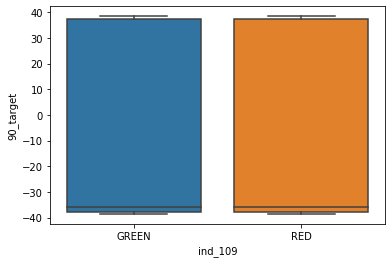

In [13]:
sns.boxplot(x = "ind_109", y = "90_target", data= df)

In [11]:
dff["ind_109"]=pd.get_dummies(dff["ind_109"])

In [8]:
dff.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [7]:

X = dff.drop(columns= ["90_target","50_target","20_target"])

y = dff["90_target"]

In [8]:
X.shape

(6167, 131)

In [9]:
# Matrix
corr_matrix = X.corr().abs()

# Korelasyon matrisindeki üçgenin üst kısmını aldık.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# 0.80 den yüksekleri seçtik.
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

# Dropladık. 
X.drop(to_drop, axis=1, inplace=True)

In [10]:
X.shape

(6167, 48)

In [11]:
X.head()

,ind_5,ind_8,ind_9,ind_14,ind_18,ind_22,ind_23,ind_25,ind_26,ind_27,...,ind_332,ind_334,ind_340,ind_344,ind_349,ind_397,ind_403,ind_412,ind_416,ind_424
0,19,100.0,85.714286,23.80,9.1100,1,56,0.002690,-0.002670,0.000010,...,20.967742,-0.000091,-0.319064,0.0,0.0,-26.386973,0.045130,0.002371,-49.6,1.0
1,24,100.0,78.571429,11.45,9.2225,1,63,0.002729,-0.003111,-0.000191,...,20.800000,-0.000091,-0.318905,0.0,0.0,-26.085949,0.035314,0.003074,-55.6,1.0
2,30,100.0,71.428571,8.75,9.3125,-1,65,0.002780,-0.003530,-0.000375,...,20.634921,-0.000091,-0.318831,0.0,0.0,-23.250410,0.005860,0.003561,-58.4,1.0
3,37,100.0,64.285714,7.80,9.4150,0,68,0.002679,-0.003961,-0.000641,...,20.472441,-0.000091,-0.318696,0.0,0.0,-19.499975,-0.018252,0.004366,-61.8,1.0
4,41,100.0,57.142857,14.90,9.8925,10,91,0.003986,-0.004624,-0.000319,...,20.312500,-0.000091,-0.318155,0.0,0.0,-25.348270,-0.007183,0.004198,-79.8,1.0


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42,shuffle=False)
#Zaman serisi olduğu için shuffle kapattık.

In [13]:
X_train.head()

,ind_5,ind_8,ind_9,ind_14,ind_18,ind_22,ind_23,ind_25,ind_26,ind_27,...,ind_332,ind_334,ind_340,ind_344,ind_349,ind_397,ind_403,ind_412,ind_416,ind_424
0,19,100.0,85.714286,23.80,9.1100,1,56,0.002690,-0.002670,0.000010,...,20.967742,-0.000091,-0.319064,0.0,0.0,-26.386973,0.045130,0.002371,-49.6,1.0
1,24,100.0,78.571429,11.45,9.2225,1,63,0.002729,-0.003111,-0.000191,...,20.800000,-0.000091,-0.318905,0.0,0.0,-26.085949,0.035314,0.003074,-55.6,1.0
2,30,100.0,71.428571,8.75,9.3125,-1,65,0.002780,-0.003530,-0.000375,...,20.634921,-0.000091,-0.318831,0.0,0.0,-23.250410,0.005860,0.003561,-58.4,1.0
3,37,100.0,64.285714,7.80,9.4150,0,68,0.002679,-0.003961,-0.000641,...,20.472441,-0.000091,-0.318696,0.0,0.0,-19.499975,-0.018252,0.004366,-61.8,1.0
4,41,100.0,57.142857,14.90,9.8925,10,91,0.003986,-0.004624,-0.000319,...,20.312500,-0.000091,-0.318155,0.0,0.0,-25.348270,-0.007183,0.004198,-79.8,1.0


In [14]:
y_test.shape

(1234,)

# PCA

In [38]:
pc = Model(dff)

[14.47 25.   32.84 39.95 45.56 50.76 55.11 59.06 62.62 65.84 68.78 71.34
 73.73 75.86 77.94 79.99 81.87 83.62 85.08 86.42 87.73 88.95 90.02 91.05
 91.98 92.87 93.68 94.44 95.13 95.8  96.39 96.96 97.47 97.81 98.11 98.4
 98.67 98.92 99.16 99.34 99.5  99.64 99.78 99.89 99.94 99.99 99.99 99.99]


(array([[ 4.05286574e+00, -3.72814855e+00,  2.66381899e+00, ...,
          8.07212273e-01, -1.45247448e-01,  1.05911474e-04],
        [ 4.60207402e+00, -3.15745308e+00,  1.52935157e+00, ...,
          6.81099627e-01,  2.24905073e-01,  2.30627368e-04],
        [ 4.75944625e+00, -1.97571109e+00,  6.79648151e-01, ...,
          6.96696760e-01,  2.40764490e-01, -3.19126462e-04],
        ...,
        [-3.36166426e+00, -1.14799653e+00, -1.42505859e+00, ...,
          7.29116947e-02, -1.96657845e-02, -2.65403589e-05],
        [-2.43377871e+00, -2.03136539e+00, -1.52098624e+00, ...,
          1.15660639e-01,  3.23710561e-02,  1.72375317e-05],
        [-2.09702296e+00, -2.24681191e+00, -1.60638358e+00, ...,
          2.92166410e-01,  6.53635788e-02,  4.27674486e-05]]),
 array([[ 1.26741425e+00,  4.72291881e-01, -1.44426723e-01, ...,
          8.69137324e-02, -1.35731392e-04,  1.73001531e-16],
        [ 8.21685646e-01,  9.58617920e-01, -1.08921905e-01, ...,
          3.77568756e-02,  1.19490296e

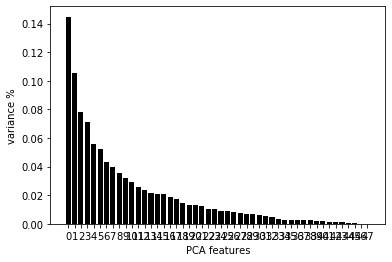

In [16]:
pc.pcaa(X_train,X_test)

In [18]:
pca = PCA(n_components=29)

In [19]:
# 29 değişkenle varyansın % 95 ini açıklayabiliyoruz.

In [20]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.fit_transform(scale(X_test))

# Linear Regression

In [21]:
dfreg=Model(dff)

In [22]:
dfreg.regmodel(X_reduced_train,X_reduced_test,y_train,y_test,LinearRegression())

Time  : 0.0780005000000017
RMSE  : 36.39812761942183
r2_score :  -0.029897900163101232


# Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
cart_model = DecisionTreeRegressor()

In [32]:
cart_model.fit(X_reduced_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [33]:
y_pred = cart_model.predict(X_reduced_test)

In [34]:
np.sqrt(mean_squared_error(y_test,y_pred))

51.881707965686886

In [35]:
from matplotlib import pyplot as plt
from sklearn import tree

In [28]:
params = {   "min_samples_leaf" : [1,2,3,4] ,  
                "max_depth" : range(1,5),
                "min_samples_split" : [2,3,5,10,15,20]}

In [29]:
reg = Model(dff)

In [30]:
reg.Grid_CV(X_reduced_train,y_train,params,DecisionTreeRegressor())

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   10.7s


{'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 15}


[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   27.9s finished


In [40]:
reg_tuned = DecisionTreeRegressor(max_depth = 1, 
                                   min_samples_leaf=2,  
                                  min_samples_split=15)
start = time.process_time()

reg_tuned.fit(X_reduced_train, y_train)

print(time.process_time() - start)

y_pred = reg_tuned.predict(X_reduced_test)

0.01560010000002876


In [41]:
np.sqrt(mean_squared_error(y_test, y_pred))

36.05011491090769

In [42]:
r2_score(y_test, y_pred)

-0.010297765999476072

In [66]:
from matplotlib import pyplot as plt
from sklearn import tree

[Text(1550.0, 1698.75, 'ind_25 <= 0.718\nmse = 1372.583\nsamples = 4933\nvalue = -3.976'),
 Text(775.0, 566.25, 'mse = 1347.066\nsamples = 4123\nvalue = -6.612'),
 Text(2325.0, 566.25, 'mse = 1287.059\nsamples = 810\nvalue = 9.441')]

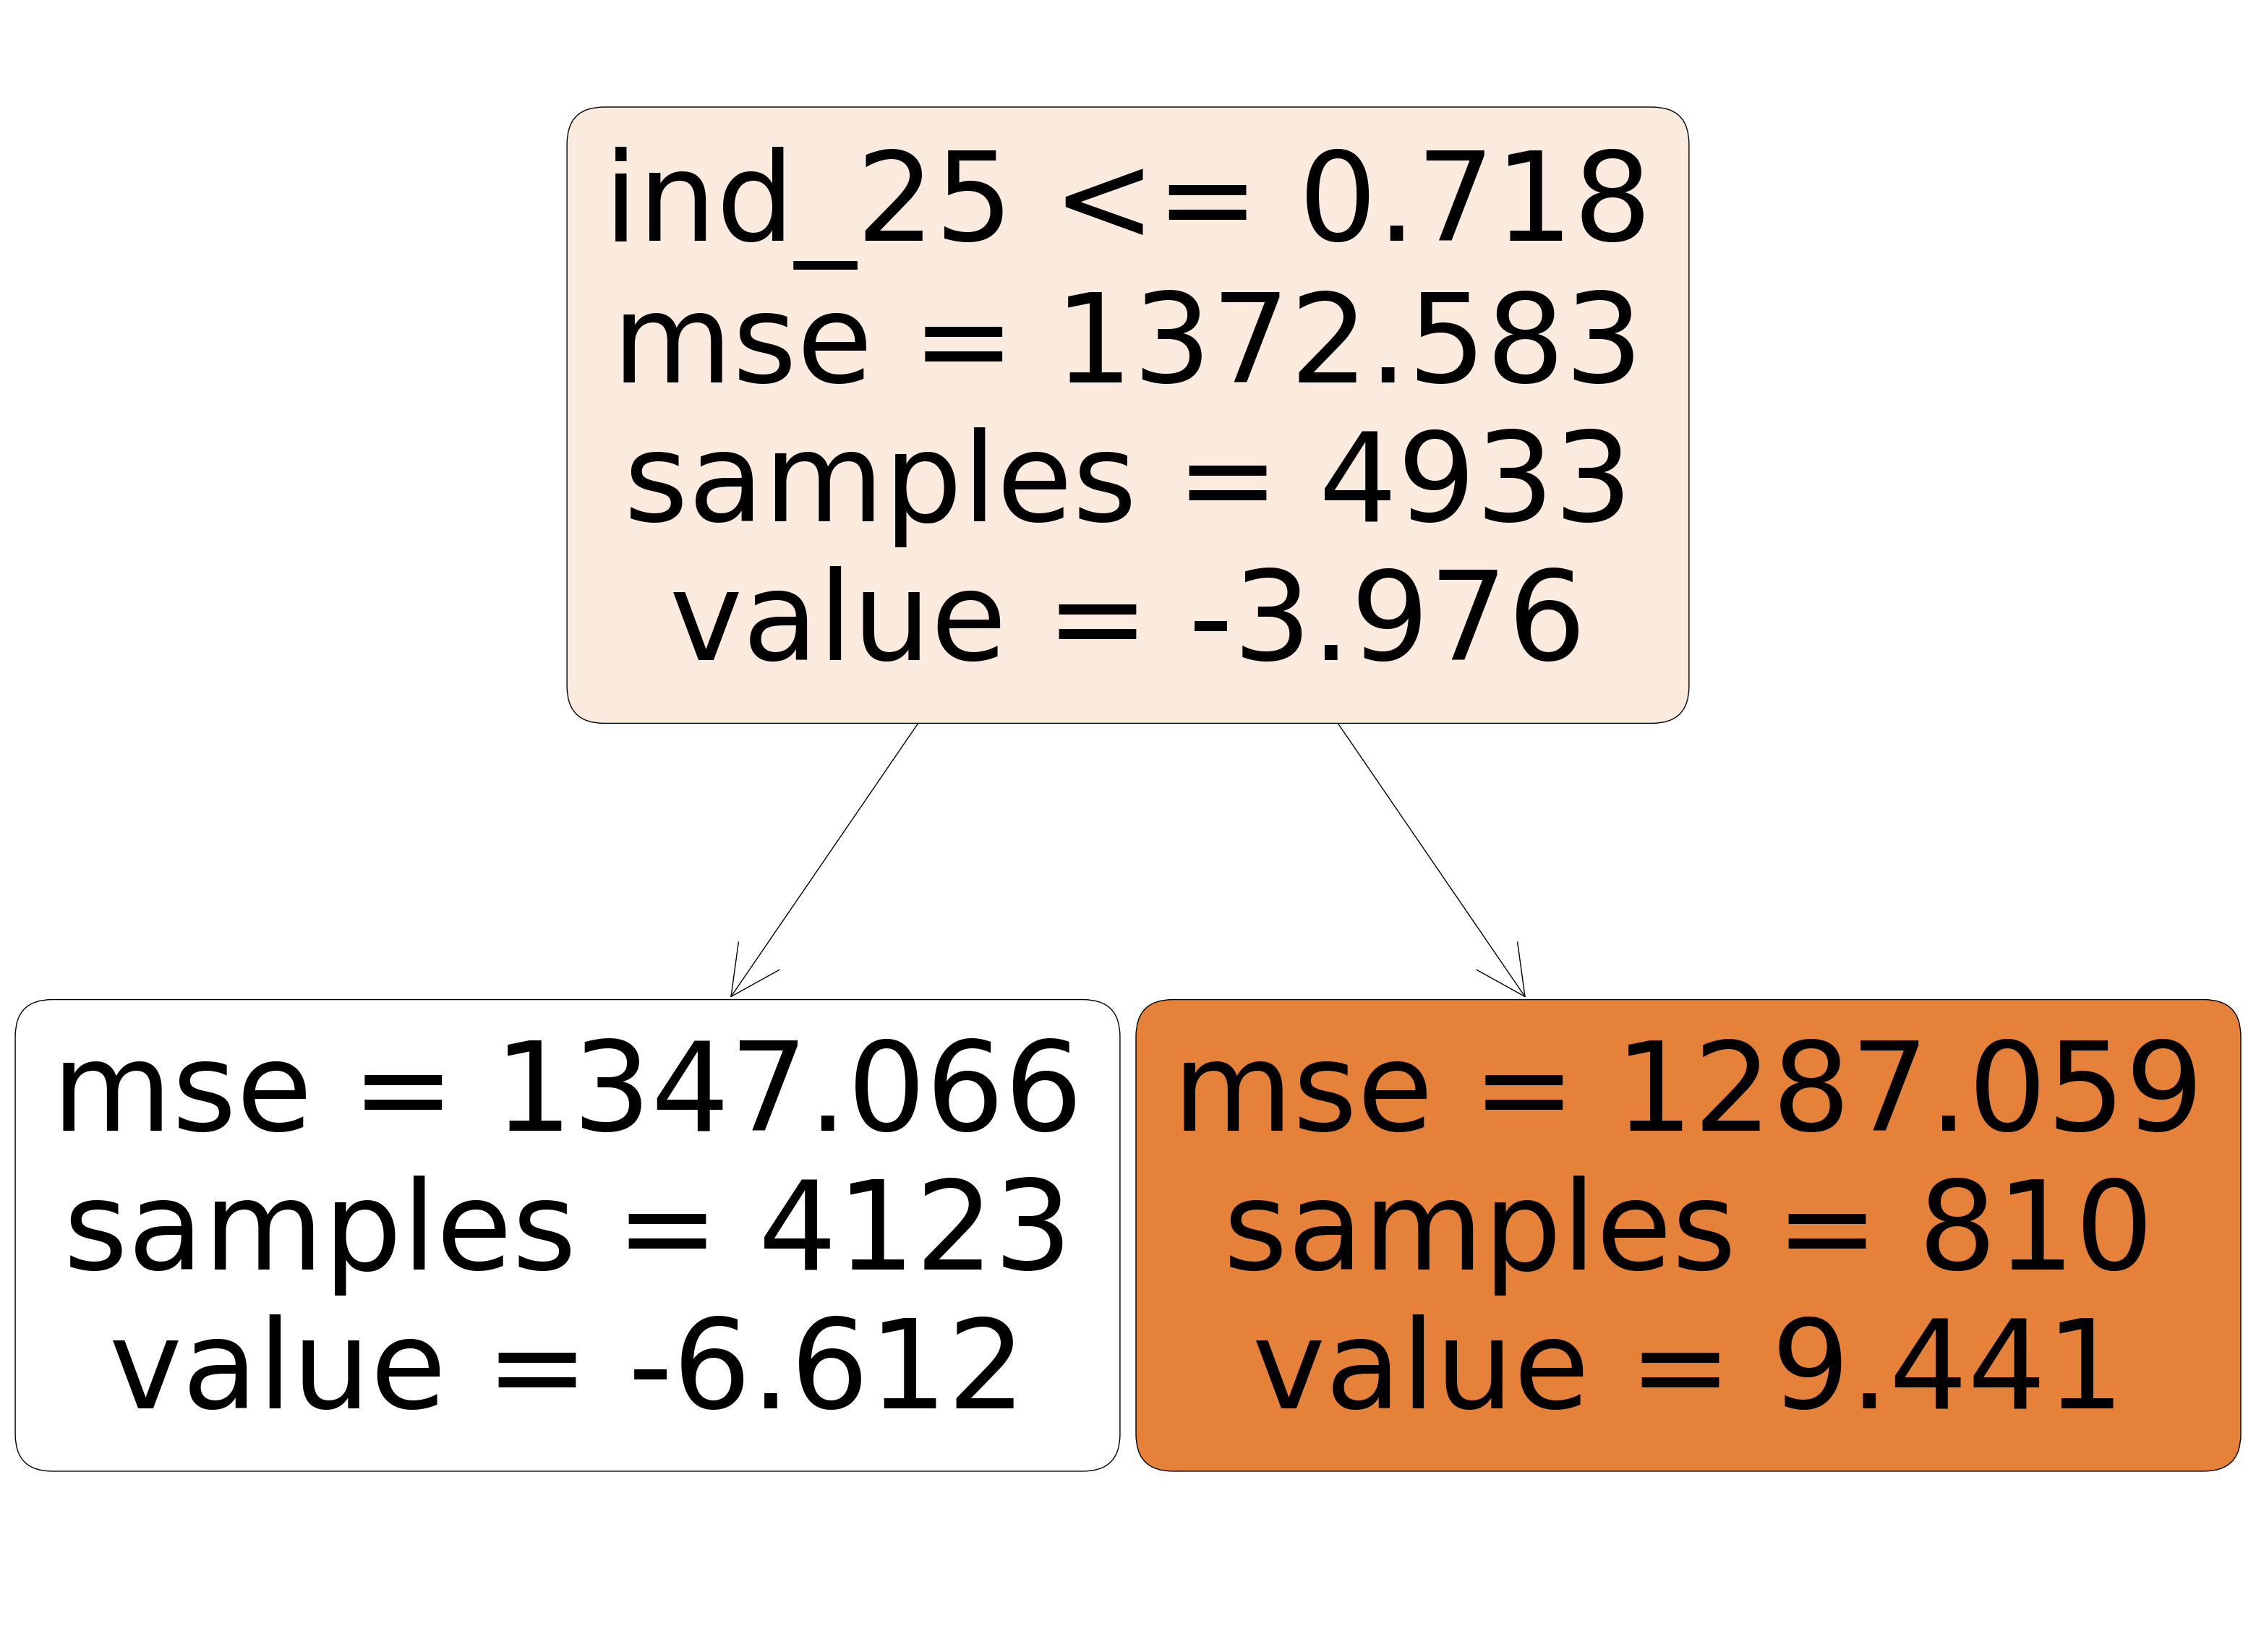

In [43]:
plt.figure(figsize=(40,30), dpi  = 100)
tree.plot_tree(reg_tuned,
               feature_names= X.columns,
              rounded = True,
              filled = True,
              impurity = True)
#plt.savefig("düz_ağaç_reg.png")

# Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [46]:
y_pred = rfr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

38.10366689188887

In [47]:
r2_score(y_test, y_pred)

-0.12867688160987223

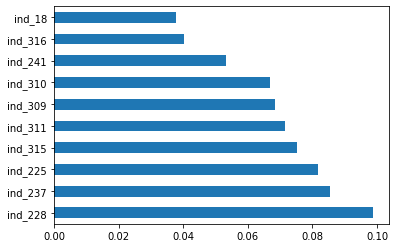

In [48]:
feature_importance = pd.Series(rfr_model.feature_importances_,
                          index=X_train.columns)
feature_importance.nlargest(10).plot(kind= "barh")

In [50]:
# Feature importance göre ilk 10 u seçtik.

In [74]:
X = dff[["ind_225","ind_316","ind_309","ind_18","ind_237","ind_311","ind_315","ind_310","ind_241","ind_228"]]

y = dff["90_target"]

In [75]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state = 42,shuffle=False)

In [54]:
params =  {      "max_depth" : [2,3,5],
                "max_features": [2,3,5,8],
                "min_samples_split" : [2,5,10],
          }

In [23]:
reg = Model(dff)

In [56]:
reg.Grid_CV(X_train,y_train,params,RandomForestRegressor(random_state=42))

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.7min finished


{'max_depth': 2, 'max_features': 2, 'min_samples_split': 2}


In [59]:
reg.regmodel(X_train,X_test,y_train,y_test,RandomForestRegressor(max_depth= 2, max_features =2, min_samples_split = 2,random_state=42))

Time  : 0.3120020000000068
RMSE  : 35.72189328372132
r2_score :  0.008015186888613246


# Neural Network

In [61]:
reg.regmodel(X_train,X_test,y_train,y_test, MLPRegressor(hidden_layer_sizes=(100,20)))

Time  : 21.04453490000003
RMSE  : 49.29060872438528
r2_score :  -0.8887063875207575


C:\Users\Taner\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Support Vector Machines

In [ ]:
#params = {   "C" : [1,2,3,5,6] ,  
      #       "kernel" : ["linear","rbf"]
    # }

In [71]:
reg.regmodel(X_train,X_test,y_train,y_test,SVR(C=6,kernel='rbf'))

Time  : 5.413234699999975
RMSE  : 41.92231093051894
r2_score :  -0.3662384873212017


In [72]:
dff.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


# XGB Regressor

In [79]:

X = dff.drop(columns= ["90_target","50_target","20_target"])

y = dff["90_target"]

In [80]:
import xgboost as xgb
from xgboost import XGBRegressor

In [81]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42,shuffle=False)

In [83]:
xgb_model = XGBRegressor().fit(X_train, y_train)

In [84]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

40.466837157989794

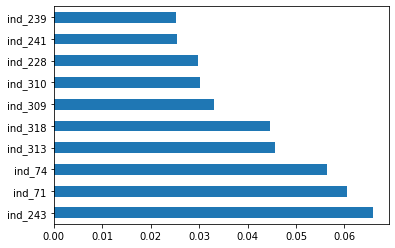

In [85]:
feature_importance = pd.Series(xgb_model.feature_importances_,
                          index=X_train.columns)
feature_importance.nlargest(10).plot(kind= "barh")

# XGB (PCA) 

In [ ]:
params = { 
     'n_estimators':[100, 200, 500],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.3,1]
}

In [ ]:
#reg.Grid_CV(X_train,y_train,params,XGBRegressor())

In [86]:
reg.regmodel(X_reduced_train,X_reduced_test,y_train,y_test,XGBRegressor())

Time  : 15.397298699999965
RMSE  : 39.3578785893304
r2_score :  -0.20420229140770152


# KNN 

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
X = dff[["ind_241","ind_239","ind_309","ind_228","ind_310","ind_311","ind_318","ind_74","ind_243","ind_71"]]

y = dff["90_target"]

In [28]:
# xgb feature importance ilk 10 u aldık.

In [19]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42,shuffle=False)

In [24]:
params = {'n_neighbors': np.arange(1,30)}

In [25]:
reg.Grid_CV(X_train,y_train,params,KNeighborsRegressor())

Fitting 10 folds for each of 29 candidates, totalling 290 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s


{'n_neighbors': 29}


[Parallel(n_jobs=-1)]: Done 290 out of 290 | elapsed:    8.0s finished


In [27]:
reg.regmodel(X_train,X_test,y_train,y_test,KNeighborsRegressor(n_neighbors = 29))

Time  : 0.015600100000000339
RMSE  : 40.9096782705976
r2_score :  -0.3010327053840387


# MultinomialNB

In [29]:
target_obj_20=[]

for i in dff['20_target']: 
    
    if i == 0 :
    
        target_obj_20.append('notr')
    
    elif i < 0: 
    
        target_obj_20.append('negatif')
        
    else :
        
        target_obj_20.append('pozitif')
    
dff['target_obj_20'] = target_obj_20

In [31]:
dff.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target,target_obj_20
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,2.0,-49.6,-54,1.0,0.498547,0.701906,15.135802,35.625252,36.997753,pozitif
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.8,-55.6,-60,1.0,0.537088,0.690833,15.143348,35.643013,37.016198,pozitif
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,2.7,-58.4,-60,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805,pozitif
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.9,-61.8,-65,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483,pozitif
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.1,-79.8,-86,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503,negatif


In [32]:

X = dff.drop(columns= ["90_target","50_target","20_target","target_obj_20"])

y = dff["target_obj_20"]

In [33]:
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state = 42,shuffle=False)

In [35]:
catt = Model(dff)

In [36]:
start = time.process_time()
                      
cart_model = MultinomialNB().fit(X_train,y_train)
           
print("Time  :" ,time.process_time() - start)
            
y_pred = cart_model.predict(X_test)
            
print("Confusion Matrix  :") 
            
print(confusion_matrix(y_test, y_pred))
            
print("Accuracy  :" , accuracy_score(y_test,y_pred))
              
print("CV Score  :" , cross_val_score(cart_model,X_test,y_test,cv=10).mean())
           
print("Model Report : ")
            
print(classification_report(y_test,y_pred))

Time  : 0.031200200000000677
Confusion Matrix  :
[[430   0 157]
 [ 29   0  11]
 [422   0 185]]
Accuracy  : 0.4983792544570502
CV Score  : 0.4887096774193548
Model Report : 
              precision    recall  f1-score   support

     negatif       0.49      0.73      0.59       587
        notr       0.00      0.00      0.00        40
     pozitif       0.52      0.30      0.39       607

    accuracy                           0.50      1234
   macro avg       0.34      0.35      0.32      1234
weighted avg       0.49      0.50      0.47      1234



C:\Users\Taner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Cluster

In [47]:

dfc = dff.drop(columns= ["90_target","50_target","20_target","target_obj_20"])

In [48]:
from sklearn.preprocessing import StandardScaler

dfc_scaled = StandardScaler().fit_transform(dfc)

In [49]:

from sklearn.decomposition import PCA
pca = PCA(n_components = 29)
pcaf = pca.fit_transform(dfc_scaled)

In [53]:
dfpca = pd.DataFrame(data = pcaf)

In [54]:
dfpca

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-11.767220,-3.283547,6.540511,-1.389414,0.676183,-0.963574,-1.859942,-0.767863,-1.244766,-2.504100,...,-0.222938,2.545749,-1.676354,-0.588930,1.255375,-0.049275,-0.374926,-0.103546,1.331786,-1.110811
1,-12.833629,-2.861085,5.054839,-0.590922,1.600563,-1.455384,-1.842758,-0.869995,-0.541415,-2.715456,...,0.050813,2.542038,-1.723070,-0.740786,1.445744,0.046061,-0.214649,0.417363,1.560376,-1.181321
2,-12.905252,-1.253024,3.573329,0.310983,1.937108,-1.420232,-1.025486,-1.106996,0.241997,-2.499543,...,-0.594885,2.009731,-1.626809,-1.101891,1.950464,-0.095975,-0.125317,0.761601,1.597725,-0.689819
3,-13.311248,-0.248272,2.623230,0.498449,1.576360,-0.317327,1.270414,-1.476014,1.166128,-2.119899,...,-1.183538,1.675942,-1.688144,-1.470658,2.231031,-0.219366,-0.145778,0.914780,1.580761,-0.406190
4,-17.150749,-3.368193,4.696447,0.263758,-0.036485,1.080741,2.464756,-1.424135,1.217020,-3.613677,...,-2.712661,0.984900,-1.350609,-2.087253,1.649920,-0.771199,0.716831,1.651975,2.635744,-0.432051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,-6.164250,7.329029,0.080420,1.561655,2.796789,4.126816,-0.490178,0.268435,-0.539206,0.279306,...,-0.362095,2.498814,0.385984,-0.065818,-2.020875,-1.071247,-1.438195,-0.759606,2.077612,1.368055
6163,-5.659881,6.815812,0.866688,0.491325,2.134612,4.951233,0.436232,0.138972,-0.416022,0.252357,...,0.729822,2.896637,0.626696,-0.140374,-1.694672,-0.653986,-1.247534,-0.746456,2.352770,1.300343
6164,-8.384126,2.685882,3.125586,-0.896970,1.392586,5.875153,1.503631,0.059423,-0.451874,1.278498,...,0.028221,2.692670,0.965208,-0.486227,-0.832103,-0.950118,-1.018383,-0.341203,2.428436,1.677359
6165,-11.617495,0.184439,5.068972,-0.926558,3.839050,7.784422,0.101989,1.189838,-2.556399,1.711117,...,0.316063,2.376507,1.272465,0.285293,-1.584857,-0.616853,-1.255584,-0.051393,2.560598,2.932066


In [55]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
k_fit = kmeans.fit(dfpca)

In [57]:
k_fit.cluster_centers_

array([[-9.28164076e+00, -6.28229705e-01,  7.05377755e-01,
         1.07717652e+00, -2.88121033e-01,  7.49657955e-02,
        -3.78555720e-02,  1.13148144e-01,  7.10231092e-02,
         1.42269527e-01, -2.81070277e-01,  1.85344247e-01,
        -1.20506296e-01,  3.12246737e-02, -4.39896413e-02,
         5.54775185e-02, -2.27531361e-02, -1.06082995e-02,
         5.55866452e-03, -2.47107984e-02,  5.98450063e-02,
         1.01831472e-01, -6.84979631e-02,  8.65793683e-02,
         7.65213721e-02,  2.22481918e-01,  5.22787140e-02,
         4.10802516e-03, -1.49683498e-02],
       [ 1.62045585e+00, -2.98287714e+00, -7.49355923e-01,
        -3.72214605e-01,  5.26275035e-01,  8.30629241e-02,
         2.95280840e-01, -2.99123082e-02, -1.17857831e-01,
        -2.22105998e-01,  1.54981242e-01, -1.23979131e-01,
        -9.47594714e-02, -6.34942441e-02, -2.53224796e-01,
        -2.19295934e-01,  2.52690046e-01, -3.41088731e-02,
        -4.88938166e-02,  7.08413148e-02, -1.10911510e-01,
        -1.01

In [59]:
kumeler=k_fit.labels_

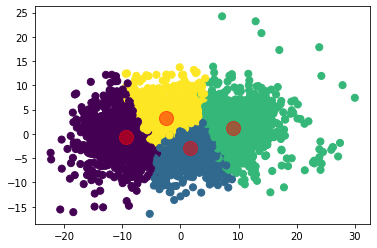

In [60]:

plt.scatter(dfpca.iloc[:,0], df_pca.iloc[:,1], c=kumeler, s=50, cmap="viridis")
merkezler = k_fit.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], c="red", s=200, alpha=0.5)
plt.show()

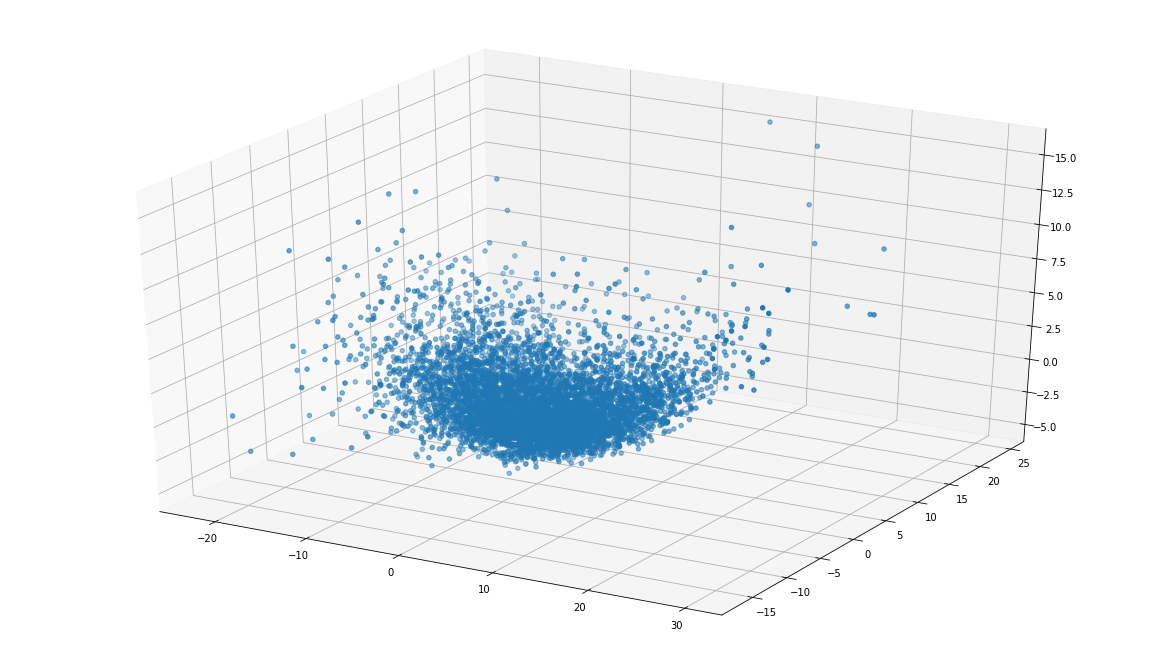

In [61]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:, 3]);